# Compute the plots from FPost output

In [1]:
import sys
sys.path.append('/mnt/lustre01/pf/a/a270046/hierarchy/pyfesom_fork') # ut.py etc. (github)

import matplotlib
#matplotlib.use('Agg')						#-- use in batch mode
from netCDF4 import Dataset, MFDataset
#import pyfesom as pf
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pylab as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from matplotlib import cm
from colorbars import cmap_correlations256, cmap_correlations_white
#from mpldatacursor import datacursor

In [2]:
##%matplotlib inline
%matplotlib nbagg
#%load_ext ipycache

In [3]:
import xarray as xr
import pandas as pd

## Load data from the different experiments

In [4]:
ls /work/ab0995/a270046/hierarchy-grids/fpost_bold

fesom_BSF.nc  fesom_HT.nc  fesom_OVERT.nc  fesom_ST.nc  test/


In [5]:
!ncdump -h /work/ab0995/a270046/hierarchy-grids/fpost_bold/fesom_HT.nc

netcdf fesom_HT {
dimensions:
	lat = 180 ;
	time = UNLIMITED ; // (30 currently)
variables:
	float lat(lat) ;
		lat:long_name = "latitude" ;
	int time ;
	double ht(time, lat) ;
	double ht_atm(time, lat) ;
	double ht_oce(time, lat) ;
}


#### load BOLD first

In [5]:
BOLD = xr.open_dataset('/work/ab0995/a270046/hierarchy-grids/fpost_bold/fesom_HT.nc', drop_variables='time')
# fix time axis
dates = pd.date_range('2078','2107', freq='AS')
BOLD.coords['time']=dates

In [6]:
lat=BOLD.variables['lat']
HT_mean_BOLD=BOLD.variables['ht'].mean(axis=0)

#### load GLOB

In [7]:
GLOB = xr.open_dataset('/work/ab0995/a270046/hierarchy-grids/fpost_glob/fesom_HT.nc', drop_variables='time')
# fix time axis
dates = pd.date_range('2078','2107', freq='AS')
GLOB.coords['time']=dates

In [8]:
HT_mean_GLOB=GLOB.variables['ht'].mean(axis=0)

#### load AGUV

In [9]:
AGUV = xr.open_dataset('/work/ab0995/a270046/hierarchy-grids/fpost_aguv/fesom_HT.nc', drop_variables='time')
# fix time axis
dates = pd.date_range('2078','2107', freq='AS')
AGUV.coords['time']=dates

In [10]:
HT_mean_AGUV=AGUV.variables['ht'].mean(axis=0)

#### load CORE

In [11]:
CORE = xr.open_dataset('/work/ab0995/a270046/hierarchy-grids/fpost_core/fesom_HT.nc', drop_variables='time')
# fix time axis
dates = pd.date_range('2078','2107', freq='AS')
CORE.coords['time']=dates

In [12]:
HT_mean_CORE=CORE.variables['ht'].mean(axis=0)

#### load REF

In [13]:
REF = xr.open_dataset('/work/ab0995/a270046/hierarchy-grids/fpost_ref/fesom_HT.nc', drop_variables='time')
# fix time axis
dates = pd.date_range('2078','2107', freq='AS')
REF.coords['time']=dates

In [14]:
HT_mean_REF=REF.variables['ht'].mean(axis=0)

#### plot meridional heat transport

<IPython.core.display.Javascript object>


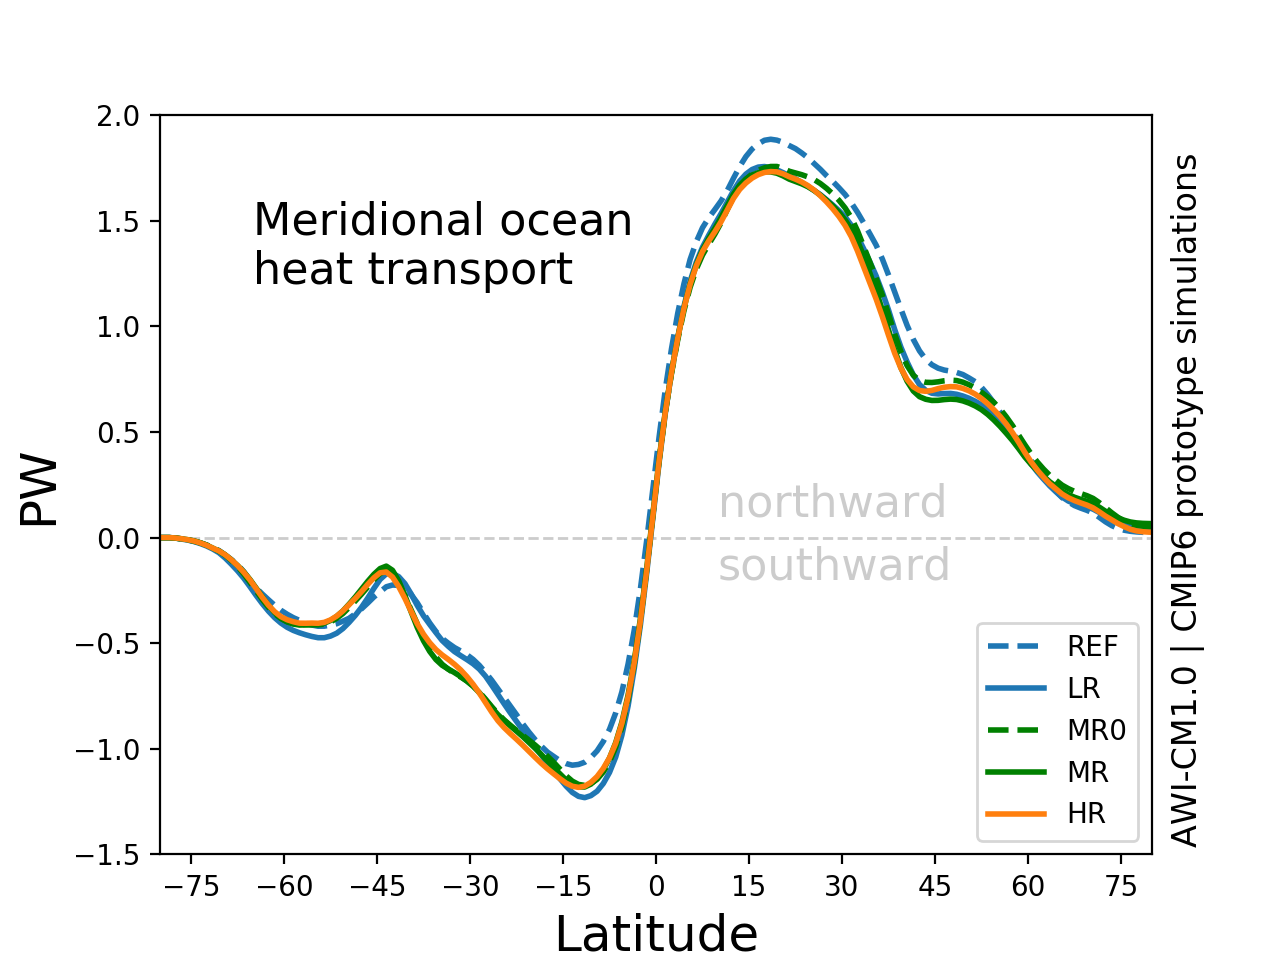

In [15]:
fig1, ax1 = plt.subplots()

# hohizontal line
ax1.plot(lat, np.zeros_like(HT_mean_BOLD), color='0.8', linestyle='--', lw=1)

# LR control
#ax1.plot(lat, HT_mean, color='paleturquoise',linewidth=3.,label='LR 1950-control') #darkturquoise
# LR scenario
#ax1.plot(lat, HT_mean_scen, color='darkcyan',linewidth=3.,label='LR scenario')

# REF
ax1.plot(lat, HT_mean_REF, color='C0',linewidth=2.,label='REF', linestyle='dashed')

# CORE
ax1.plot(lat, HT_mean_CORE, color='C0',linewidth=2.,label='LR')

# MR0
ax1.plot(lat, HT_mean_AGUV, color='green',linewidth=2.,label='MR0',linestyle='dashed')

# MR
ax1.plot(lat, HT_mean_GLOB, color='green',linewidth=2.,label='MR')

# HR
ax1.plot(lat, HT_mean_BOLD, color='C1',linewidth=2.,label='HR')


# config
ax1.set_xlim([-80,80])
plt.xticks([-75,-60,-45,-30,-15,0,15,30,45,60,75])
ax1.set_ylim([-1.5,2.])

plt.legend(loc='lower right')
plt.text(83, 1.7, 'AWI-CM1.0 | CMIP6 prototype simulations', rotation=90, fontsize=12)
plt.ylabel('PW', fontsize=18)
plt.xlabel('Latitude',fontsize=18)

plt.text(-65, 1.2, 'Meridional ocean\nheat transport', fontsize=16)
plt.text(10, 0.1, 'northward', fontsize=16, color='0.8')
plt.text(10, -0.2, 'southward', fontsize=16, color='0.8')

In [93]:
saveFIG=True
if saveFIG==True:
   pp = PdfPages('/pf/a/a270046/hierarchy/figures/revisionFPOST/'+'HT_fpost_all.pdf')
   pp.savefig(fig1,bbox_inches = 'tight')
   pp.close()

### Now salt transport

#### load BOLD first

In [16]:
BOLD = xr.open_dataset('/work/ab0995/a270046/hierarchy-grids/fpost_bold/fesom_ST.nc', drop_variables='time')
# fix time axis
dates = pd.date_range('2078','2107', freq='AS')
BOLD.coords['time']=dates

In [17]:
lat=BOLD.variables['lat']
ST_mean_BOLD=BOLD.variables['st'].mean(axis=0)

#### load GLOB

In [18]:
GLOB = xr.open_dataset('/work/ab0995/a270046/hierarchy-grids/fpost_glob/fesom_ST.nc', drop_variables='time')
# fix time axis
dates = pd.date_range('2078','2107', freq='AS')
GLOB.coords['time']=dates

In [19]:
ST_mean_GLOB=GLOB.variables['st'].mean(axis=0)

#### load AGUV

In [20]:
AGUV = xr.open_dataset('/work/ab0995/a270046/hierarchy-grids/fpost_aguv/fesom_ST.nc', drop_variables='time')
# fix time axis
dates = pd.date_range('2078','2107', freq='AS')
AGUV.coords['time']=dates

In [21]:
ST_mean_AGUV=AGUV.variables['st'].mean(axis=0)

#### load CORE

In [22]:
CORE = xr.open_dataset('/work/ab0995/a270046/hierarchy-grids/fpost_core/fesom_ST.nc', drop_variables='time')
# fix time axis
dates = pd.date_range('2078','2107', freq='AS')
CORE.coords['time']=dates

In [23]:
ST_mean_CORE=CORE.variables['st'].mean(axis=0)

#### load REF

In [24]:
REF = xr.open_dataset('/work/ab0995/a270046/hierarchy-grids/fpost_ref/fesom_ST.nc', drop_variables='time')
# fix time axis
dates = pd.date_range('2078','2107', freq='AS')
REF.coords['time']=dates

In [25]:
ST_mean_REF=REF.variables['st'].mean(axis=0)

<IPython.core.display.Javascript object>


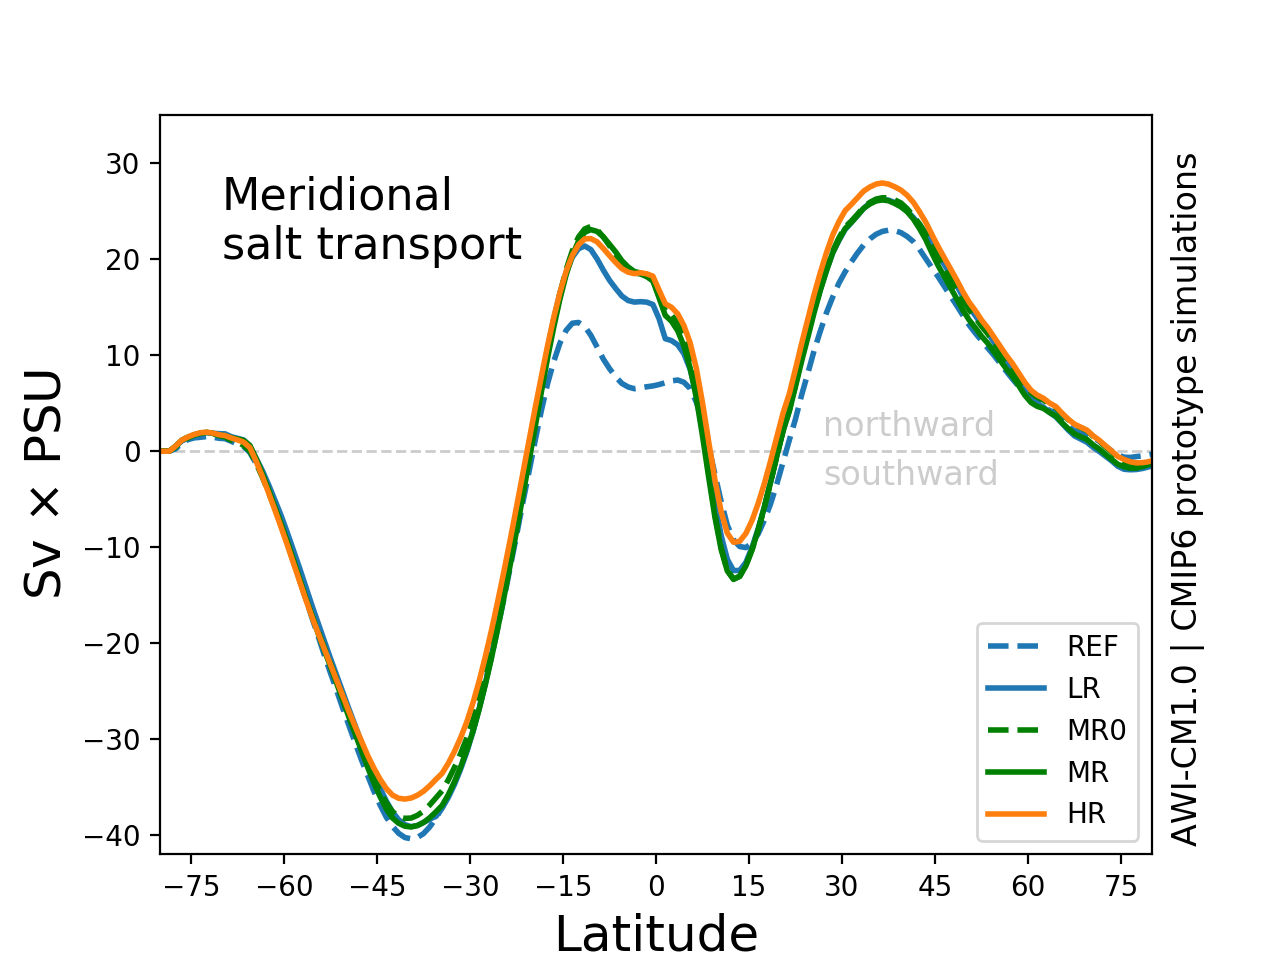

In [26]:
fig1, ax1 = plt.subplots()

# horizontal line
ax1.plot(lat, np.zeros_like(ST_mean_BOLD), color='0.8', linestyle='--', lw=1)

# LR control
#ax1.plot(lat, HT_mean, color='paleturquoise',linewidth=3.,label='LR 1950-control') #darkturquoise
# LR scenario
#ax1.plot(lat, HT_mean_scen, color='darkcyan',linewidth=3.,label='LR scenario')

# REF
ax1.plot(lat, 34.*ST_mean_REF, color='C0',linewidth=2.,label='REF', linestyle='dashed')

# CORE
ax1.plot(lat, 34.*ST_mean_CORE, color='C0',linewidth=2.,label='LR')

# MR0
ax1.plot(lat, 34.*ST_mean_AGUV, color='green',linewidth=2.,label='MR0',linestyle='dashed')

# MR
ax1.plot(lat, 34.*ST_mean_GLOB, color='green',linewidth=2.,label='MR')

# HR
ax1.plot(lat, 34.*ST_mean_BOLD, color='C1',linewidth=2.,label='HR')


# config
ax1.set_xlim([-80,80])
plt.xticks([-75,-60,-45,-30,-15,0,15,30,45,60,75])
ax1.set_ylim([-42.,35.])

plt.legend(loc='lower right')
plt.text(83, 28.5, 'AWI-CM1.0 | CMIP6 prototype simulations', rotation=90, fontsize=12)
plt.ylabel(r'Sv $\times$ PSU', fontsize=18)
plt.xlabel('Latitude',fontsize=18)

plt.text(-70, 20., 'Meridional\nsalt transport', fontsize=16)
plt.text(27, 1.6, 'northward', fontsize=12, color='0.8')
plt.text(27, -3.5, 'southward', fontsize=12, color='0.8')

In [115]:
saveFIG=True
if saveFIG==True:
   pp = PdfPages('/pf/a/a270046/hierarchy/figures/revisionFPOST/'+'ST_fpost_all.pdf')
   pp.savefig(fig1,bbox_inches = 'tight')
   pp.close()

### Now plot the overturning (MOC)

In [28]:
!ncdump -h /work/ab0995/a270046/hierarchy-grids/fpost_bold/fesom_OVERT.nc

netcdf fesom_OVERT {
dimensions:
	lon = 360 ;
	lat = 180 ;
	lev = 46 ;
	time = UNLIMITED ; // (30 currently)
variables:
	float lon(lon) ;
		lon:long_name = "longitude" ;
	float lat(lat) ;
		lat:long_name = "latitude" ;
	float lev(lev) ;
		lev:units = "meters" ;
		lev:long_name = "depth below sea level" ;
	int time ;
	double g_overt(time, lev, lat) ;
}


In [195]:
OVERTfile = '/work/ab0995/a270046/hierarchy-grids/fpost_bold/fesom_OVERT.nc'
fl = MFDataset(OVERTfile)

In [196]:
OVERT_mean_BOLD=fl.variables['g_overt'][:,:,:].mean(axis=0)

lev=fl.variables['lev'][:]
lat=fl.variables['lat'][:]

fl.close()

In [197]:
np.shape(OVERT_mean_BOLD)

(46, 180)

In [198]:
LEV,LAT=np.meshgrid(lat,lev)
np.shape(LEV), np.shape(LAT)

((46, 180), (46, 180))

In [199]:
mapplot_BOLD = np.ma.masked_where(OVERT_mean_BOLD==0.,OVERT_mean_BOLD)

<IPython.core.display.Javascript object>


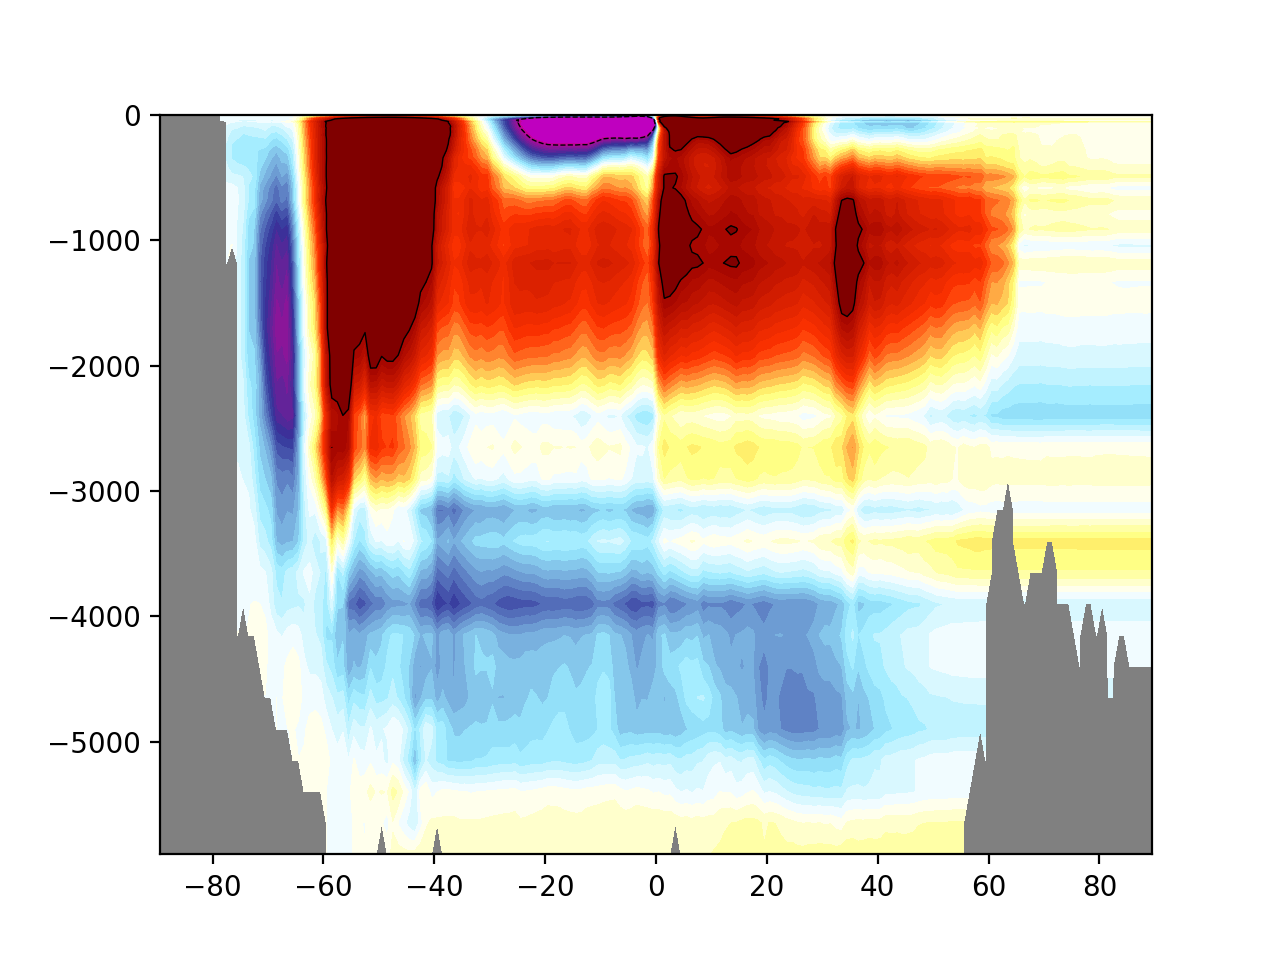

In [200]:
fig1, ax1 = plt.subplots()

ax1 = plt.subplot(111)
ax1.set_facecolor('0.5')

cmap=cmap_correlations256
cmap.set_under('m',1)
cmap.set_over('maroon',1)

ax1.contourf(LEV,LAT,mapplot_BOLD,levels=np.arange(-20,20,1),cmap=cmap,vmin=-20.,vmax=20.,extend='both')
ax1.contour(LEV,LAT,mapplot_BOLD,levels=[-19,19],colors=['k','k'],linewidths=0.5,linestyles=['dashed','solid'])
plt.show()

#### GLOB

In [201]:
OVERTfile = '/work/ab0995/a270046/hierarchy-grids/fpost_glob/fesom_OVERT.nc'
fl = MFDataset(OVERTfile)

In [202]:
OVERT_mean_GLOB=fl.variables['g_overt'][:,:,:].mean(axis=0)

lev=fl.variables['lev'][:]
lat=fl.variables['lat'][:]

fl.close()

In [203]:
mapplot_GLOB = np.ma.masked_where(OVERT_mean_GLOB==0.,OVERT_mean_GLOB)

#### AGUV

In [204]:
OVERTfile = '/work/ab0995/a270046/hierarchy-grids/fpost_aguv/fesom_OVERT.nc'
fl = MFDataset(OVERTfile)

In [205]:
OVERT_mean_AGUV=fl.variables['g_overt'][:,:,:].mean(axis=0)

lev=fl.variables['lev'][:]
lat=fl.variables['lat'][:]

fl.close()

In [206]:
mapplot_AGUV = np.ma.masked_where(OVERT_mean_AGUV==0.,OVERT_mean_AGUV)

#### CORE

In [207]:
OVERTfile = '/work/ab0995/a270046/hierarchy-grids/fpost_core/fesom_OVERT.nc'
fl = MFDataset(OVERTfile)

In [208]:
OVERT_mean_CORE=fl.variables['g_overt'][:,:,:].mean(axis=0)

lev=fl.variables['lev'][:]
lat=fl.variables['lat'][:]

fl.close()

In [209]:
mapplot_CORE = np.ma.masked_where(OVERT_mean_CORE==0.,OVERT_mean_CORE)

#### REF

In [210]:
OVERTfile = '/work/ab0995/a270046/hierarchy-grids/fpost_ref/fesom_OVERT.nc'
fl = MFDataset(OVERTfile)

In [211]:
OVERT_mean_REF=fl.variables['g_overt'][:,:,:].mean(axis=0)

lev=fl.variables['lev'][:]
lat=fl.variables['lat'][:]

fl.close()

In [212]:
mapplot_REF = np.ma.masked_where(OVERT_mean_REF==0.,OVERT_mean_REF)

<IPython.core.display.Javascript object>


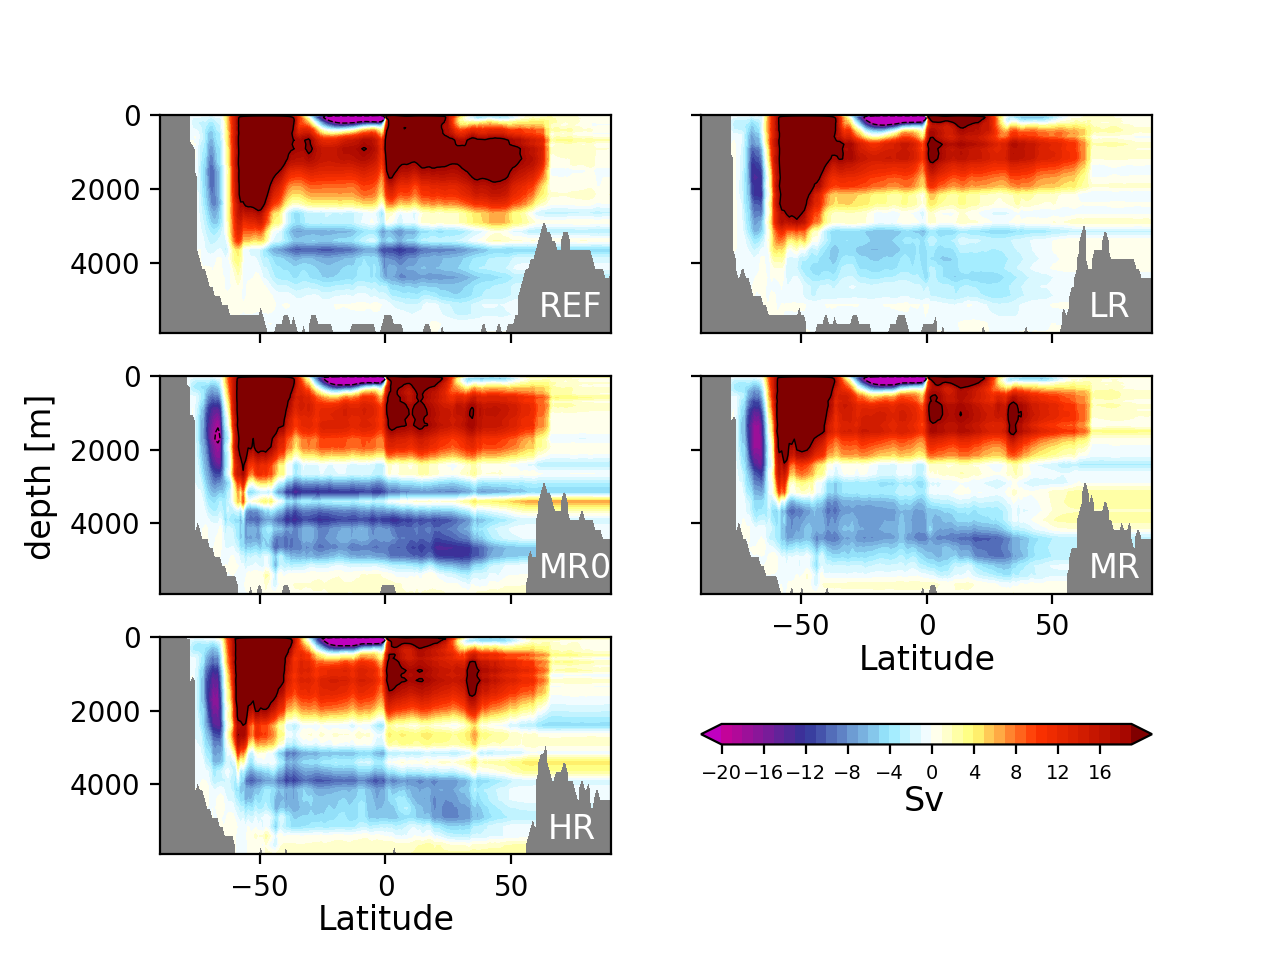

In [213]:
fig2, ax1 = plt.subplots(squeeze=False)

ax1 = plt.subplot(325)
ax1.set_facecolor('0.5')

cmap=cmap_correlations256
cmap.set_under('m',1)
cmap.set_over('maroon',1)

# BOLD (HR)
ax1.contourf(LEV,-LAT,mapplot_BOLD,levels=np.arange(-20,20,1),cmap=cmap,vmin=-20.,vmax=20.,extend='both')
ax1.contour(LEV,-LAT,mapplot_BOLD,levels=[-19,19],colors=['k','k'],linewidths=0.5,linestyles=['dashed','solid'])
ax1.invert_yaxis()
t2=ax1.annotate('HR', xy=(.86, 0.07), xycoords='axes fraction', backgroundcolor = 'none', color='w', fontsize=12)
#bb = t2.get_bbox_patch()
#bb.set_boxstyle("square", pad=0.3) 
ax1.annotate('Latitude', xy=(.35, -.35), xycoords='axes fraction', rotation=0, backgroundcolor = 'none', color='k', fontsize=12)

ax1 = plt.subplot(324)
ax1.set_facecolor('0.5')
# GLOB (MR)
ax1.contourf(LEV,-LAT,mapplot_GLOB,levels=np.arange(-20,20,1),cmap=cmap,vmin=-20.,vmax=20.,extend='both')
ax1.contour(LEV,-LAT,mapplot_GLOB,levels=[-19,19],colors=['k','k'],linewidths=0.5,linestyles=['dashed','solid'])
ax1.invert_yaxis()
t2=ax1.annotate('MR', xy=(.86, 0.07), xycoords='axes fraction', backgroundcolor = 'none', color='w', fontsize=12)
ax1.set_yticklabels([])
ax1.annotate('Latitude', xy=(.35, -.35), xycoords='axes fraction', rotation=0, backgroundcolor = 'none', color='k', fontsize=12)
ax1.annotate('Sv', xy=(.45, -1.), xycoords='axes fraction', rotation=0, backgroundcolor = 'none', color='k', fontsize=12)

ax1 = plt.subplot(323)
ax1.set_facecolor('0.5')
# AGUV (MR0)
ax1.contourf(LEV,-LAT,mapplot_AGUV,levels=np.arange(-20,20,1),cmap=cmap,vmin=-20.,vmax=20.,extend='both')
ax1.contour(LEV,-LAT,mapplot_AGUV,levels=[-19,19],colors=['k','k'],linewidths=0.5,linestyles=['dashed','solid'])
ax1.invert_yaxis()
t2=ax1.annotate('MR0', xy=(.84, 0.07), xycoords='axes fraction', backgroundcolor = 'none', color='w', fontsize=12)
ax1.set_xticklabels([])
ax1.annotate('depth [m]', xy=(-.3, 0.8), xycoords='axes fraction', rotation=90, backgroundcolor = 'none', color='k', fontsize=12)

ax1 = plt.subplot(322)
ax1.set_facecolor('0.5')
# CORE (LR)
ax1.contourf(LEV,-LAT,mapplot_CORE,levels=np.arange(-20,20,1),cmap=cmap,vmin=-20.,vmax=20.,extend='both')
ax1.contour(LEV,-LAT,mapplot_CORE,levels=[-19,19],colors=['k','k'],linewidths=0.5,linestyles=['dashed','solid'])
ax1.invert_yaxis()
t2=ax1.annotate('LR', xy=(.86, 0.07), xycoords='axes fraction', backgroundcolor = 'none', color='w', fontsize=12)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

ax1 = plt.subplot(321)
ax1.set_facecolor('0.5')
# REF
im=ax1.contourf(LEV,-LAT,mapplot_REF,levels=np.arange(-20,20,1),cmap=cmap,vmin=-20.,vmax=20.,extend='both')
ax1.contour(LEV,-LAT,mapplot_REF,levels=[-19,19],colors=['k','k'],linewidths=0.5,linestyles=['dashed','solid'])
ax1.invert_yaxis()
t2=ax1.annotate('REF', xy=(.84, 0.07), xycoords='axes fraction', backgroundcolor = 'none', color='w', fontsize=12)
ax1.set_xticklabels([])

ax1 = plt.subplot(326)

cbar=plt.colorbar(im, orientation='horizontal',fraction=0.6, pad=0.07)
cbar.ax.tick_params(labelsize=7) 
plt.delaxes(ax1)


plt.show()

In [214]:
saveFIG=True
if saveFIG==True:
   pp = PdfPages('/pf/a/a270046/hierarchy/figures/revisionFPOST/'+'MOC_fpost_all.pdf')
   pp.savefig(fig2,bbox_inches = 'tight')
   pp.close()

#### Do AMOC now

In [222]:
!ncdump -h /work/ab0995/a270046/hierarchy-grids/fpost_bold_NA/fesom_OVERT.nc

netcdf fesom_OVERT {
dimensions:
	lon = 360 ;
	lat = 180 ;
	lev = 46 ;
	time = UNLIMITED ; // (30 currently)
variables:
	float lon(lon) ;
		lon:long_name = "longitude" ;
	float lat(lat) ;
		lat:long_name = "latitude" ;
	float lev(lev) ;
		lev:units = "meters" ;
		lev:long_name = "depth below sea level" ;
	int time ;
	double g_overt(time, lev, lat) ;
}


In [223]:
OVERTfile = '/work/ab0995/a270046/hierarchy-grids/fpost_bold_NA/fesom_OVERT.nc'
fl = MFDataset(OVERTfile)

In [224]:
OVERT_mean_BOLD=fl.variables['g_overt'][:,:,:].mean(axis=0)

lev=fl.variables['lev'][:]
lat=fl.variables['lat'][:]

fl.close()

In [225]:
np.shape(OVERT_mean_BOLD)

(46, 180)

In [226]:
LEV,LAT=np.meshgrid(lat,lev)
np.shape(LEV), np.shape(LAT)

((46, 180), (46, 180))

In [227]:
mapplot_BOLD = np.ma.masked_where(OVERT_mean_BOLD==0.,OVERT_mean_BOLD)

<IPython.core.display.Javascript object>


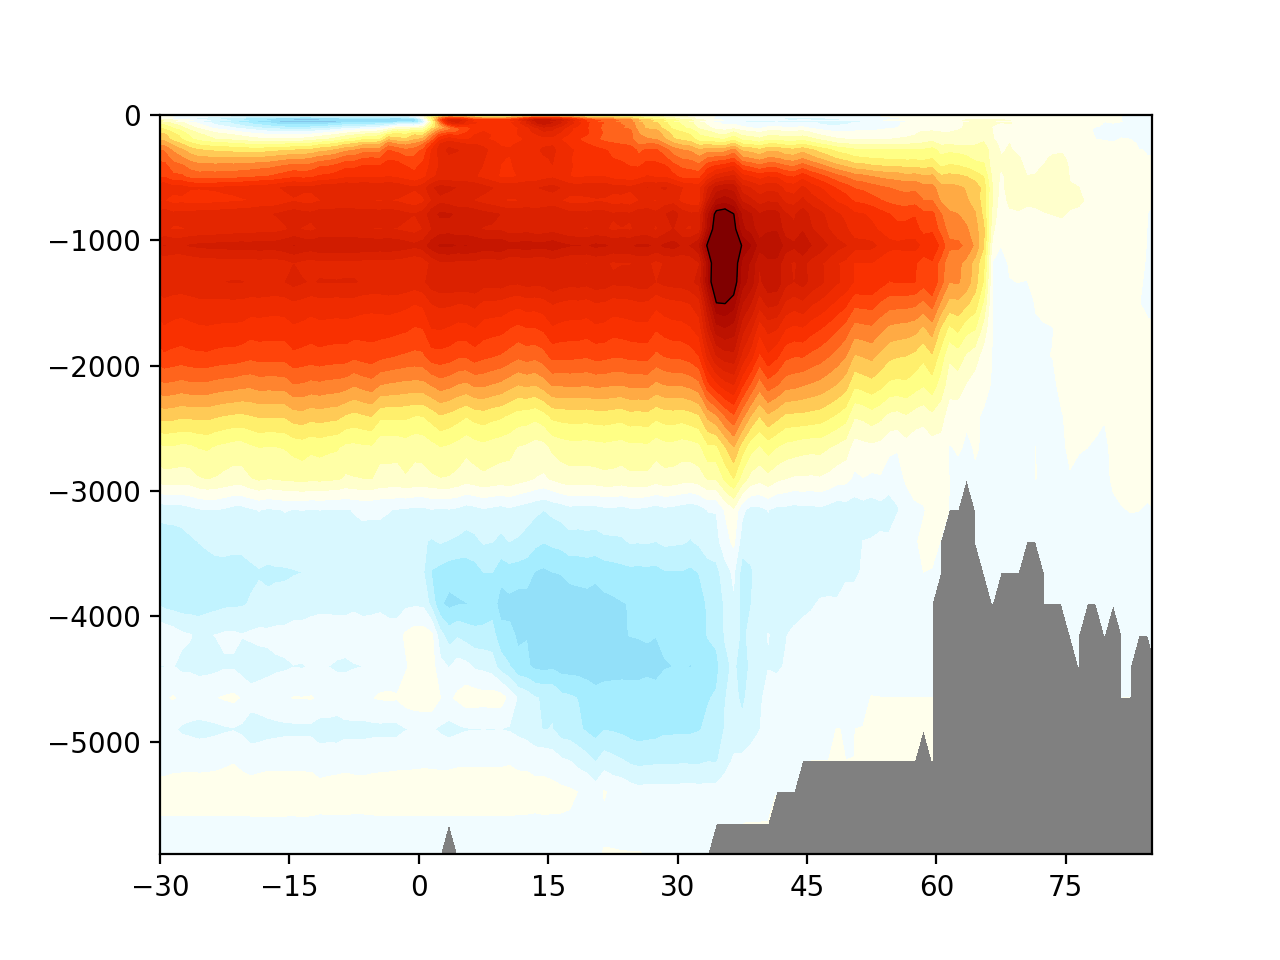

In [234]:
fig1, ax1 = plt.subplots()

ax1 = plt.subplot(111)
ax1.set_facecolor('0.5')

cmap=cmap_correlations256
cmap.set_under('m',1)
cmap.set_over('maroon',1)

ax1.contourf(LEV,LAT,mapplot_BOLD,levels=np.arange(-20,20,1),cmap=cmap,vmin=-20.,vmax=20.,extend='both')
ax1.contour(LEV,LAT,mapplot_BOLD,levels=[-19,19],colors=['k','k'],linewidths=0.5,linestyles=['dashed','solid'])

# config
ax1.set_xlim([-30,85])
plt.xticks([-30,-15,0,15,30,45,60,75])

plt.show()

#### GLOB

In [235]:
OVERTfile = '/work/ab0995/a270046/hierarchy-grids/fpost_glob_NA/fesom_OVERT.nc'
fl = MFDataset(OVERTfile)

In [236]:
OVERT_mean_GLOB=fl.variables['g_overt'][:,:,:].mean(axis=0)

lev=fl.variables['lev'][:]
lat=fl.variables['lat'][:]

fl.close()

In [237]:
mapplot_GLOB = np.ma.masked_where(OVERT_mean_GLOB==0.,OVERT_mean_GLOB)

#### AGUV

In [238]:
OVERTfile = '/work/ab0995/a270046/hierarchy-grids/fpost_aguv_NA/fesom_OVERT.nc'
fl = MFDataset(OVERTfile)

In [239]:
OVERT_mean_AGUV=fl.variables['g_overt'][:,:,:].mean(axis=0)

lev=fl.variables['lev'][:]
lat=fl.variables['lat'][:]

fl.close()

In [240]:
mapplot_AGUV = np.ma.masked_where(OVERT_mean_AGUV==0.,OVERT_mean_AGUV)

#### CORE

In [241]:
OVERTfile = '/work/ab0995/a270046/hierarchy-grids/fpost_core_NA/fesom_OVERT.nc'
fl = MFDataset(OVERTfile)

In [242]:
OVERT_mean_CORE=fl.variables['g_overt'][:,:,:].mean(axis=0)

lev=fl.variables['lev'][:]
lat=fl.variables['lat'][:]

fl.close()

In [243]:
mapplot_CORE = np.ma.masked_where(OVERT_mean_CORE==0.,OVERT_mean_CORE)

#### REF

In [244]:
OVERTfile = '/work/ab0995/a270046/hierarchy-grids/fpost_ref_NA/fesom_OVERT.nc'
fl = MFDataset(OVERTfile)

In [245]:
OVERT_mean_REF=fl.variables['g_overt'][:,:,:].mean(axis=0)

lev=fl.variables['lev'][:]
lat=fl.variables['lat'][:]

fl.close()

In [246]:
mapplot_REF = np.ma.masked_where(OVERT_mean_REF==0.,OVERT_mean_REF)

<IPython.core.display.Javascript object>


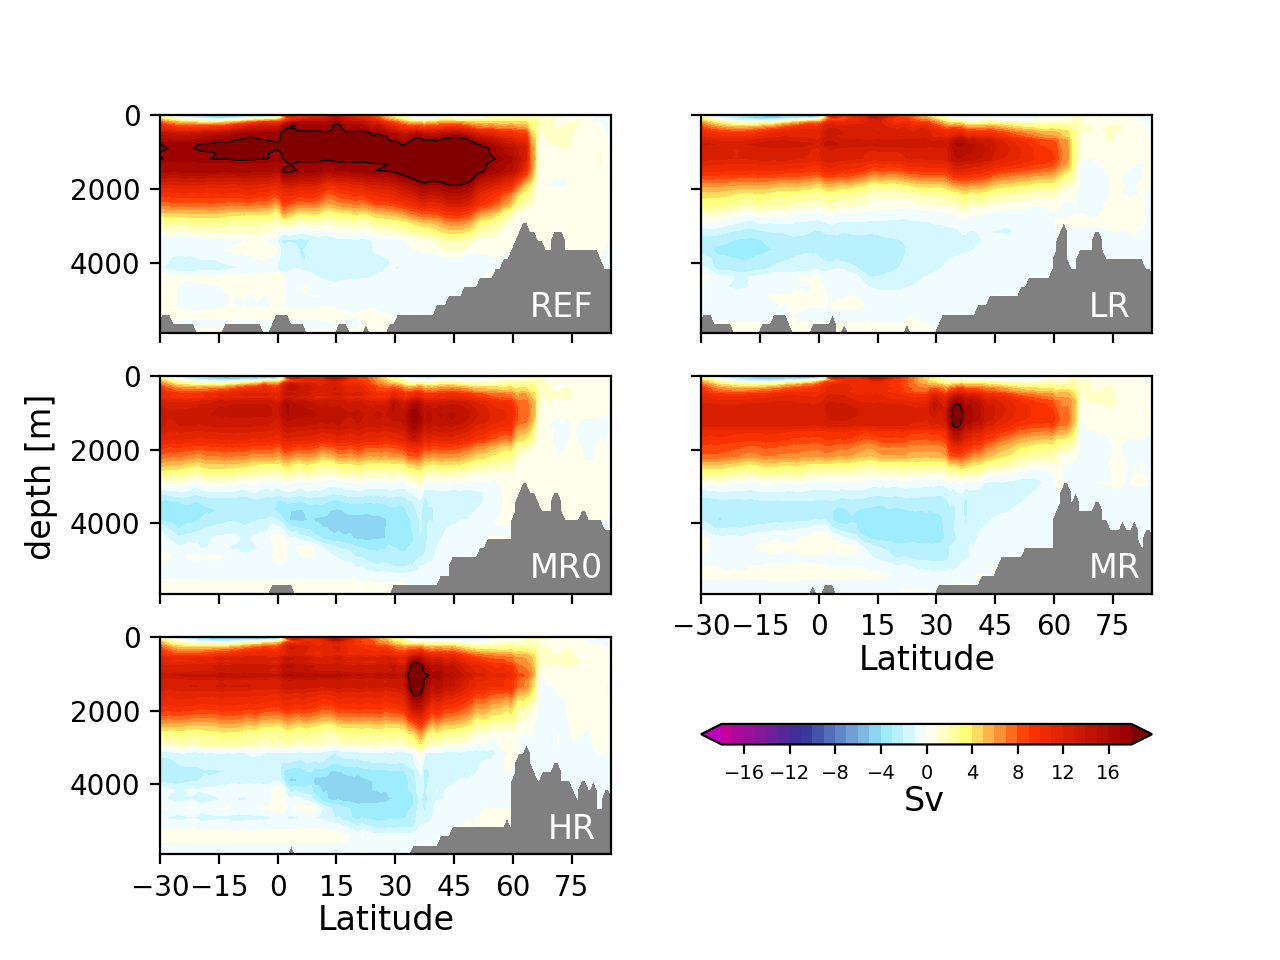

In [256]:
fig2, ax1 = plt.subplots(squeeze=False)

ax1 = plt.subplot(325)
ax1.set_facecolor('0.5')

cmap=cmap_correlations256
cmap.set_under('m',1)
cmap.set_over('maroon',1)

# BOLD (HR)
ax1.contourf(LEV,-LAT,mapplot_BOLD,levels=np.arange(-18,18+1,1),cmap=cmap,vmin=-18.,vmax=18.,extend='both')
ax1.contour(LEV,-LAT,mapplot_BOLD,levels=[-17,18],colors=['k','k'],linewidths=0.5,linestyles=['dashed','solid'])
ax1.invert_yaxis()
t2=ax1.annotate('HR', xy=(.86, 0.07), xycoords='axes fraction', backgroundcolor = 'none', color='w', fontsize=12)
#bb = t2.get_bbox_patch()
#bb.set_boxstyle("square", pad=0.3) 
ax1.annotate('Latitude', xy=(.35, -.35), xycoords='axes fraction', rotation=0, backgroundcolor = 'none', color='k', fontsize=12)
# config
ax1.set_xlim([-30,85])
plt.xticks([-30,-15,0,15,30,45,60,75])

ax1 = plt.subplot(324)
ax1.set_facecolor('0.5')
# GLOB (MR)
ax1.contourf(LEV,-LAT,mapplot_GLOB,levels=np.arange(-18,18+1,1),cmap=cmap,vmin=-18.,vmax=18.,extend='both')
ax1.contour(LEV,-LAT,mapplot_GLOB,levels=[-17,18],colors=['k','k'],linewidths=0.5,linestyles=['dashed','solid'])
ax1.invert_yaxis()
t2=ax1.annotate('MR', xy=(.86, 0.07), xycoords='axes fraction', backgroundcolor = 'none', color='w', fontsize=12)
ax1.set_yticklabels([])
ax1.annotate('Latitude', xy=(.35, -.35), xycoords='axes fraction', rotation=0, backgroundcolor = 'none', color='k', fontsize=12)
ax1.annotate('Sv', xy=(.45, -1.), xycoords='axes fraction', rotation=0, backgroundcolor = 'none', color='k', fontsize=12)
# config
ax1.set_xlim([-30,85])
plt.xticks([-30,-15,0,15,30,45,60,75])

ax1 = plt.subplot(323)
ax1.set_facecolor('0.5')
# AGUV (MR0)
ax1.contourf(LEV,-LAT,mapplot_AGUV,levels=np.arange(-18,18+1,1),cmap=cmap,vmin=-18.,vmax=18.,extend='both')
ax1.contour(LEV,-LAT,mapplot_AGUV,levels=[-17,18],colors=['k','k'],linewidths=0.5,linestyles=['dashed','solid'])
ax1.invert_yaxis()
t2=ax1.annotate('MR0', xy=(.82, 0.07), xycoords='axes fraction', backgroundcolor = 'none', color='w', fontsize=12)
ax1.set_xticklabels([])
ax1.annotate('depth [m]', xy=(-.3, 0.8), xycoords='axes fraction', rotation=90, backgroundcolor = 'none', color='k', fontsize=12)
# config
ax1.set_xlim([-30,85])
plt.xticks([-30,-15,0,15,30,45,60,75])

ax1 = plt.subplot(322)
ax1.set_facecolor('0.5')
# CORE (LR)
ax1.contourf(LEV,-LAT,mapplot_CORE,levels=np.arange(-18,18+1,1),cmap=cmap,vmin=-18.,vmax=18.,extend='both')
ax1.contour(LEV,-LAT,mapplot_CORE,levels=[-17,18],colors=['k','k'],linewidths=0.5,linestyles=['dashed','solid'])
ax1.invert_yaxis()
t2=ax1.annotate('LR', xy=(.86, 0.07), xycoords='axes fraction', backgroundcolor = 'none', color='w', fontsize=12)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
# config
ax1.set_xlim([-30,85])
plt.xticks([-30,-15,0,15,30,45,60,75])

ax1 = plt.subplot(321)
ax1.set_facecolor('0.5')
# REF
im=ax1.contourf(LEV,-LAT,mapplot_REF,levels=np.arange(-18,18+1,1),cmap=cmap,vmin=-18.,vmax=18.,extend='both')
ax1.contour(LEV,-LAT,mapplot_REF,levels=[-17,18],colors=['k','k'],linewidths=0.5,linestyles=['dashed','solid'])
ax1.invert_yaxis()
t2=ax1.annotate('REF', xy=(.82, 0.07), xycoords='axes fraction', backgroundcolor = 'none', color='w', fontsize=12)
ax1.set_xticklabels([])
# config
ax1.set_xlim([-30,85])
plt.xticks([-30,-15,0,15,30,45,60,75])

ax1 = plt.subplot(326)

cbar=plt.colorbar(im, orientation='horizontal',fraction=0.6, pad=0.07)
cbar.ax.tick_params(labelsize=7) 
plt.delaxes(ax1)


plt.show()

In [257]:
saveFIG=True
if saveFIG==True:
   pp = PdfPages('/pf/a/a270046/hierarchy/figures/revisionFPOST/'+'AMOC_fpost_all.pdf')
   pp.savefig(fig2,bbox_inches = 'tight')
   pp.close()

#### Now do the ACC transport

##### Drake passage transport

In [142]:
!ncdump -h /work/ab0995/a270046/hierarchy-grids/fpost_ref/fesom_BSF.nc

netcdf fesom_BSF {
dimensions:
	lon = 360 ;
	lat = 180 ;
	time = UNLIMITED ; // (30 currently)
variables:
	float lon(lon) ;
	float lat(lat) ;
	int time ;
	double bsf(time, lat, lon) ;
}


In [143]:
BSFfile = '/work/ab0995/a270046/hierarchy-grids/fpost_ref/fesom_BSF.nc'
fl = MFDataset(BSFfile)

REF_bsf=fl.variables['bsf'][:,:,:].mean(axis=0)
fl.close()

<IPython.core.display.Javascript object>


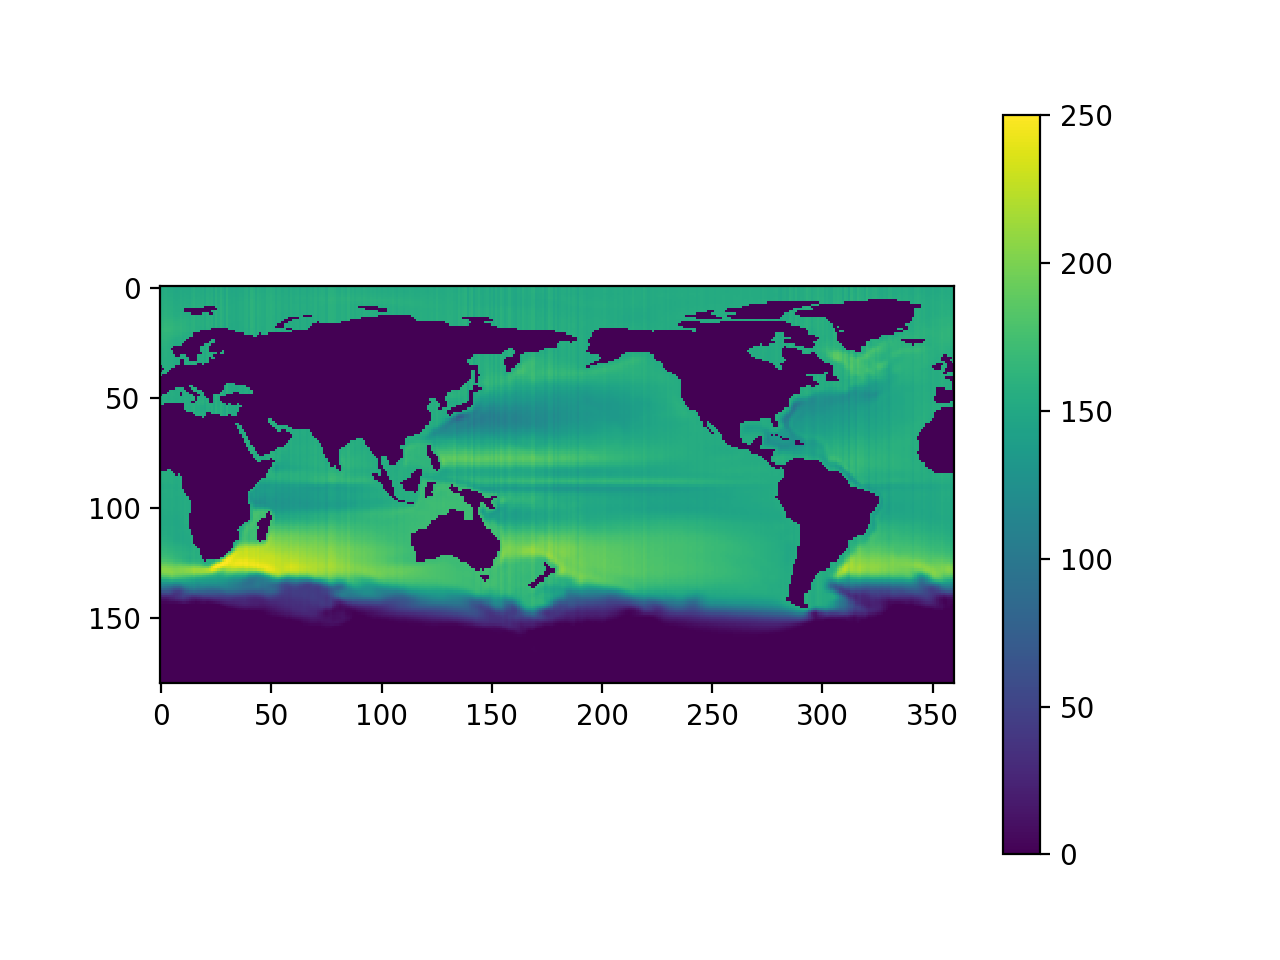

In [170]:
fig2, ax1 = plt.subplots(squeeze=False)

plt.imshow(np.flipud(np.squeeze(REF_bsf[:,:])),vmin=0, vmax=250)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


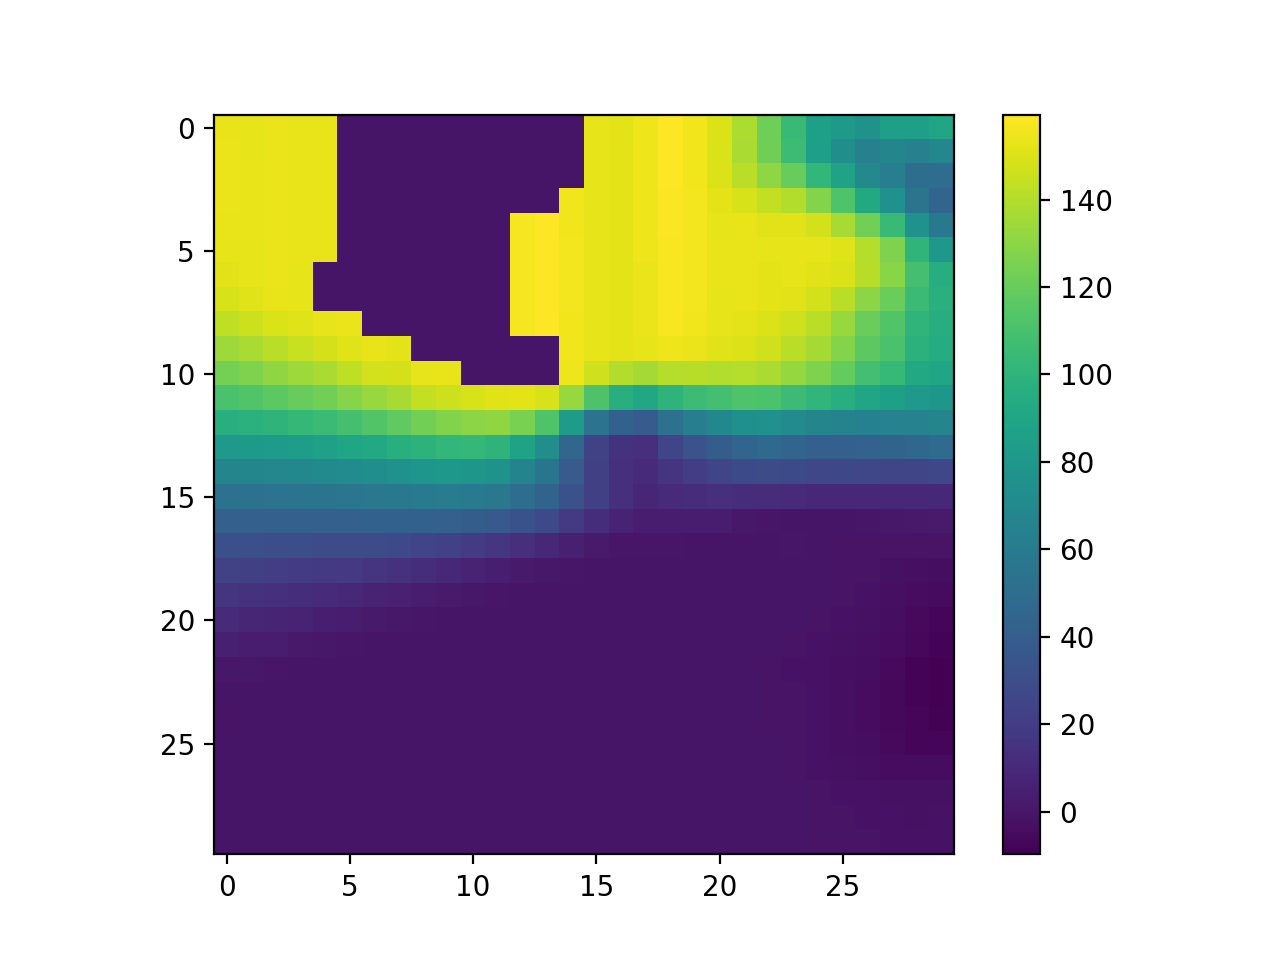

In [152]:
fig3, ax1 = plt.subplots(squeeze=False)

plt.imshow(np.flipud(np.squeeze(REF_bsf[15:45,280:310])))
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


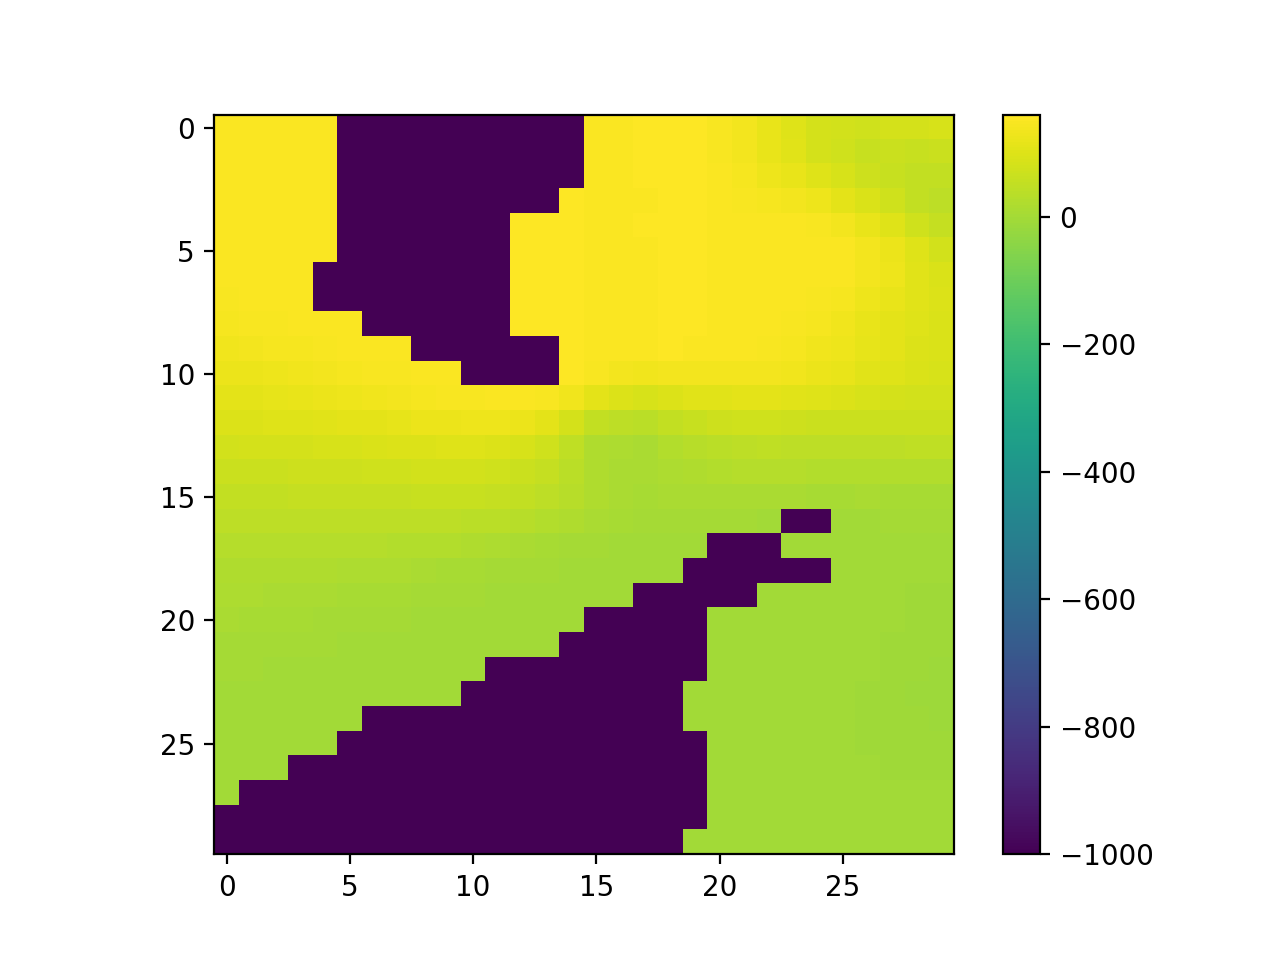

In [153]:
fig4, ax1 = plt.subplots(squeeze=False)
plotfield=np.copy(np.flipud(REF_bsf[15:45,280:310]))
plotfield[plotfield==0]=-1000. # missing
myax=plt.imshow(plotfield)
#datacursor(myax)
plt.colorbar()

In [154]:
plotfield[11,14] # Cape Horn

133.41373921431219

In [155]:
plotfield[20,14] # northern tip of Antarctica

-0.024979769359389857

In [156]:
plotfield[11,14] - plotfield[20,14]

133.43871898367158

#### CORE

In [157]:
BSFfile = '/work/ab0995/a270046/hierarchy-grids/fpost_core/fesom_BSF.nc'
fl = MFDataset(BSFfile)

CORE_bsf=fl.variables['bsf'][:,:,:].mean(axis=0)
fl.close()

<IPython.core.display.Javascript object>


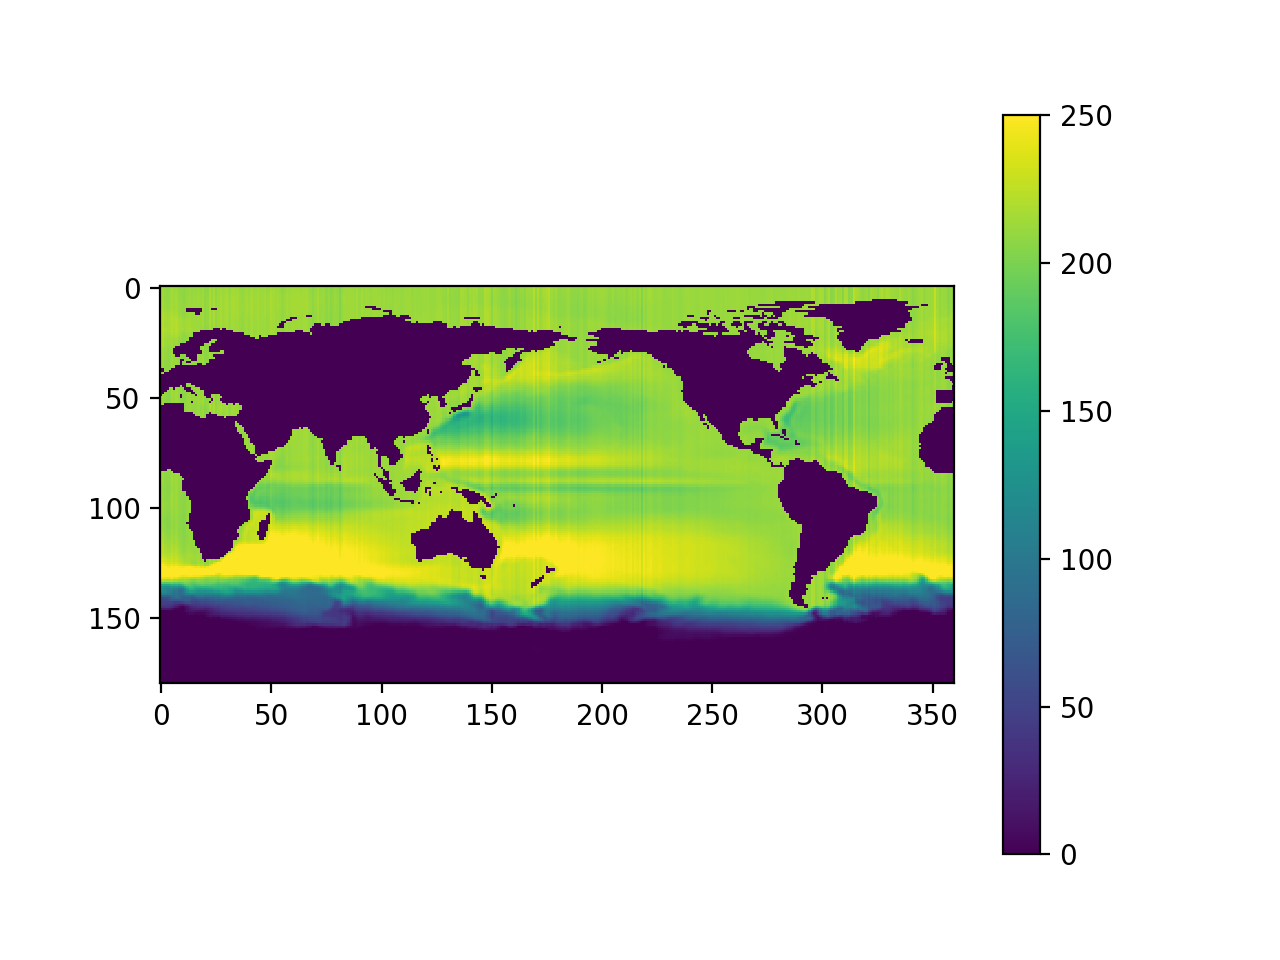

In [171]:
fig2, ax1 = plt.subplots(squeeze=False)

plt.imshow(np.flipud(np.squeeze(CORE_bsf[:,:])),vmin=0, vmax=250)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


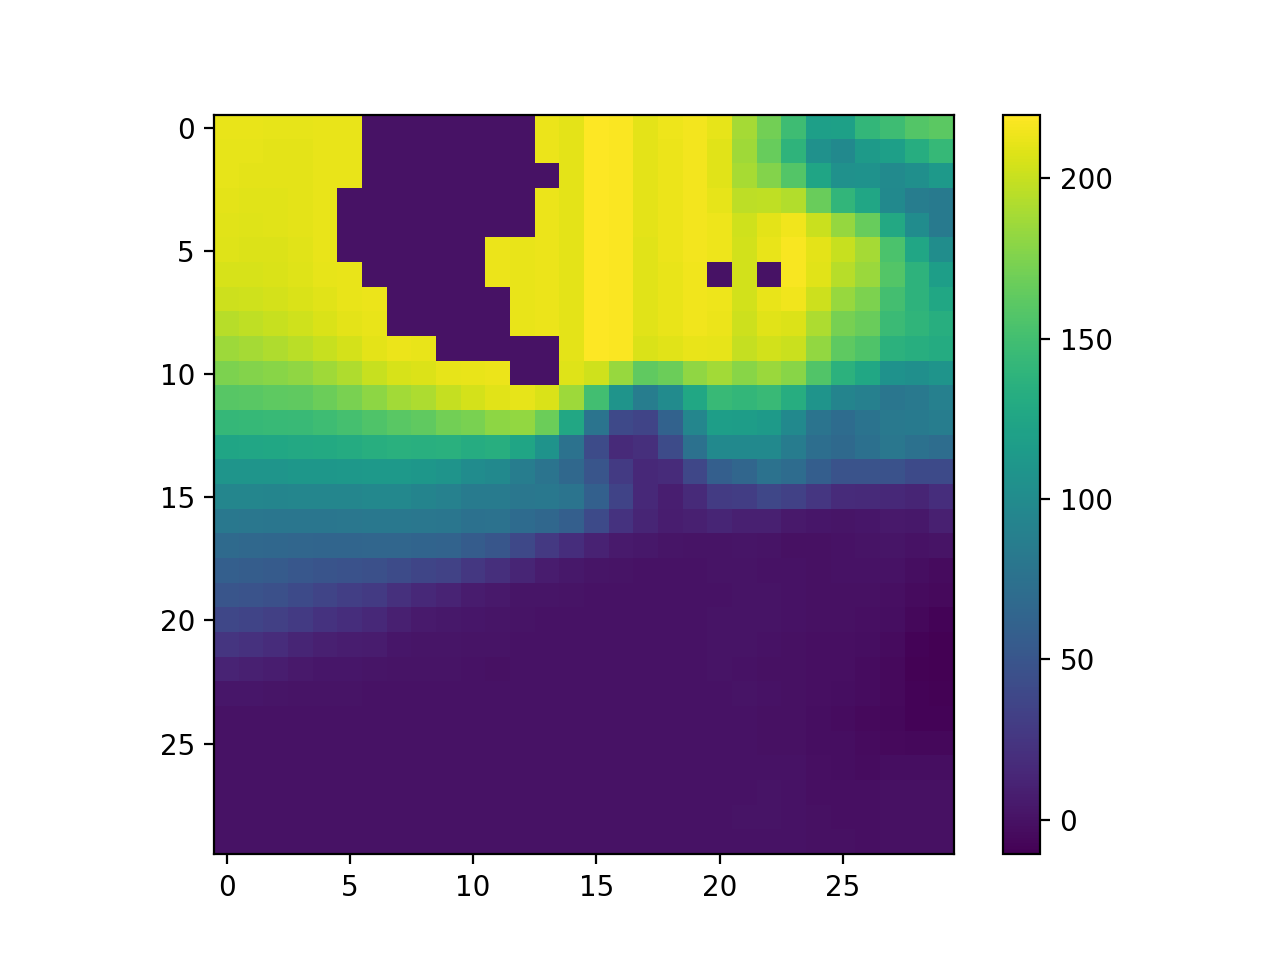

In [159]:
fig3, ax1 = plt.subplots(squeeze=False)

plt.imshow(np.flipud(np.squeeze(CORE_bsf[15:45,280:310])))
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


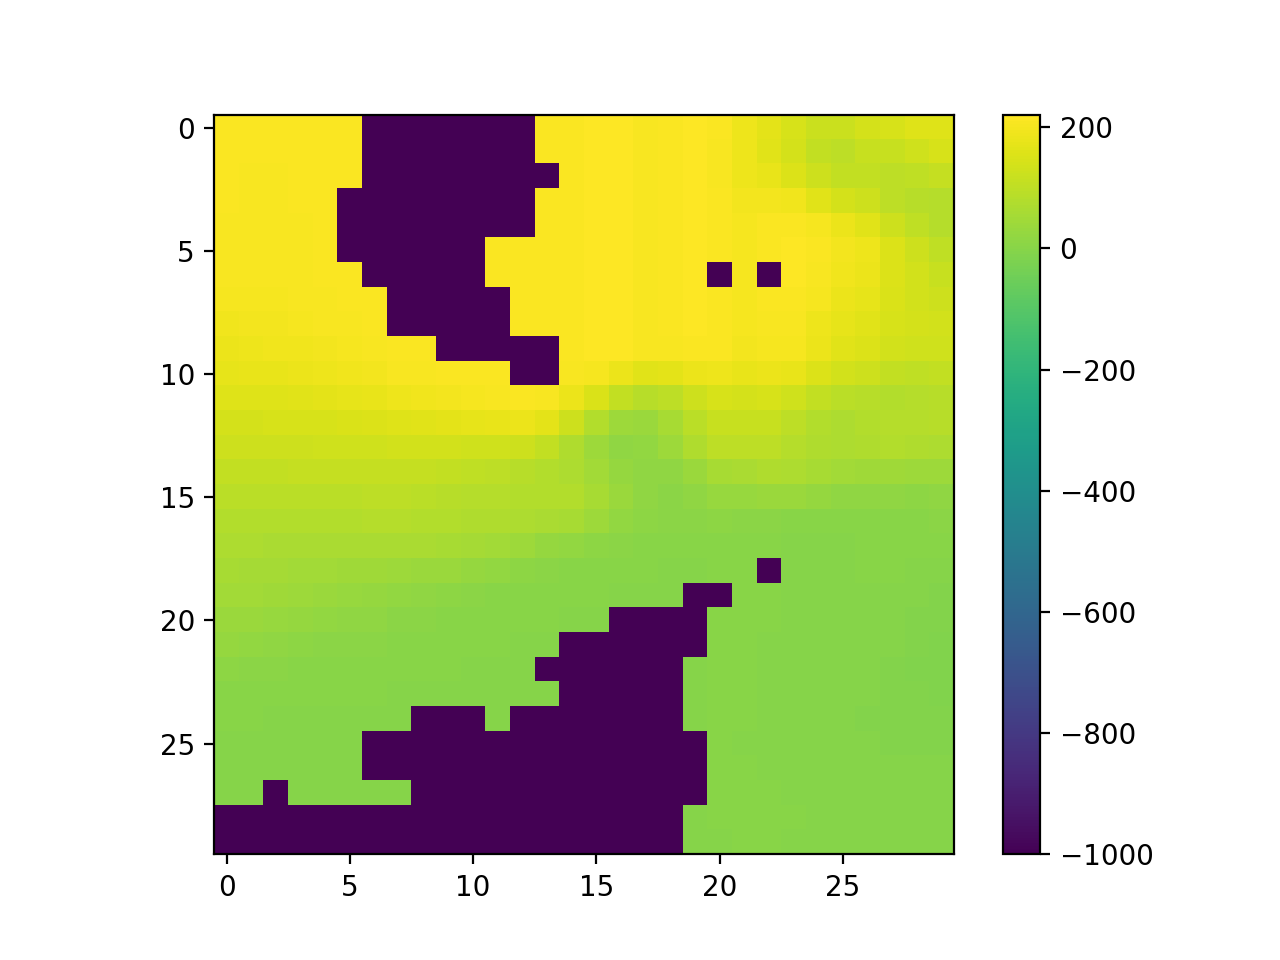

In [160]:
fig4, ax1 = plt.subplots(squeeze=False)
plotfield=np.copy(np.flipud(CORE_bsf[15:45,280:310]))
plotfield[plotfield==0]=-1000. # missing
myax=plt.imshow(plotfield)
#datacursor(myax)
plt.colorbar()

In [125]:
plotfield[11,14] # Cape Horn

186.14502230417094

In [126]:
plotfield[11,14] - plotfield[20,14]

186.04481881196122

#### AGUV

In [161]:
BSFfile = '/work/ab0995/a270046/hierarchy-grids/fpost_aguv/fesom_BSF.nc'
fl = MFDataset(BSFfile)

AGUV_bsf=fl.variables['bsf'][:,:,:].mean(axis=0)
fl.close()

<IPython.core.display.Javascript object>


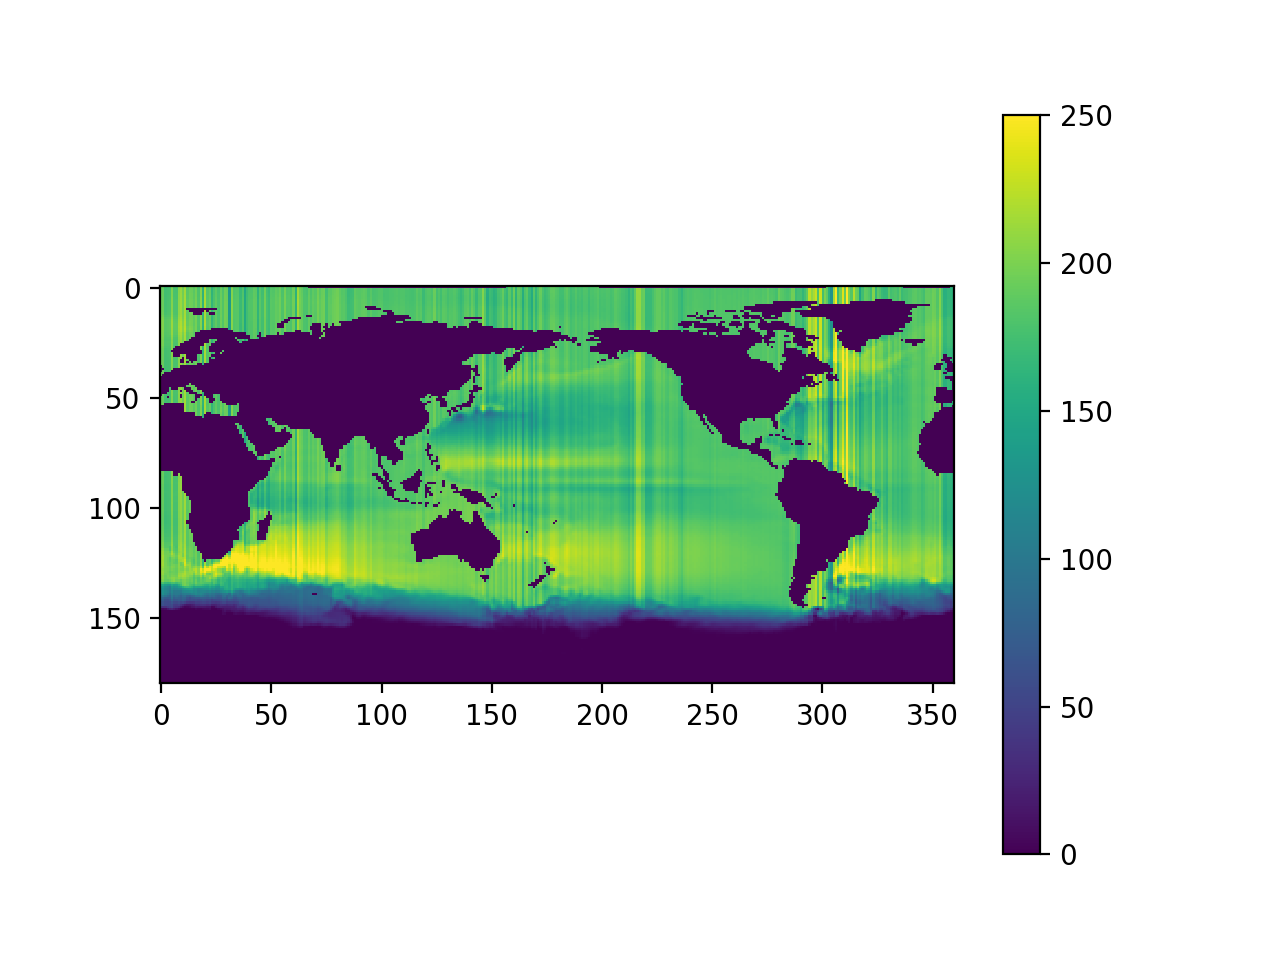

In [172]:
fig2, ax1 = plt.subplots(squeeze=False)

plt.imshow(np.flipud(np.squeeze(AGUV_bsf[:,:])),vmin=0, vmax=250)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


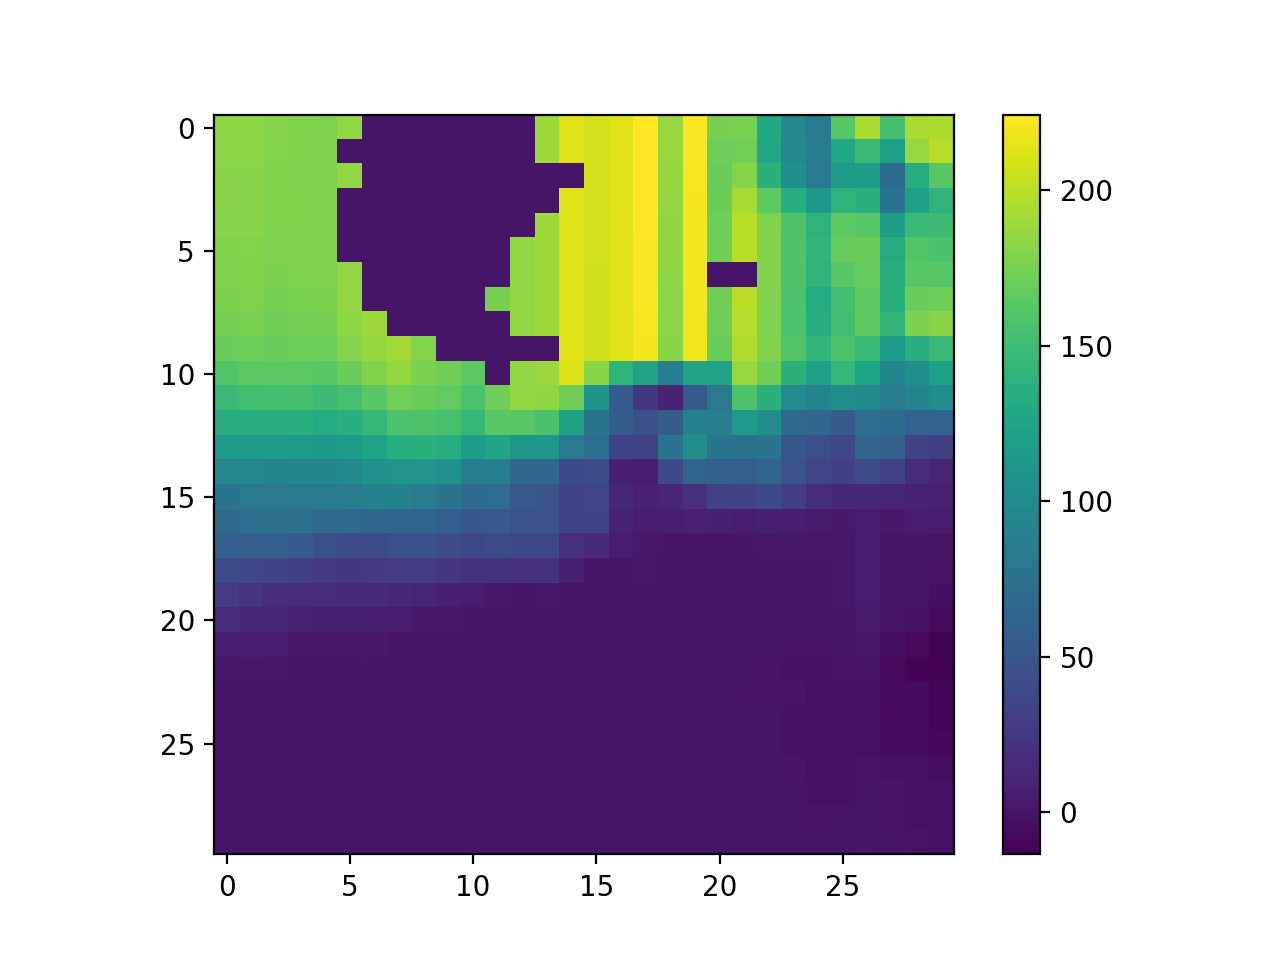

In [163]:
fig3, ax1 = plt.subplots(squeeze=False)

plt.imshow(np.flipud(np.squeeze(AGUV_bsf[15:45,280:310])))
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


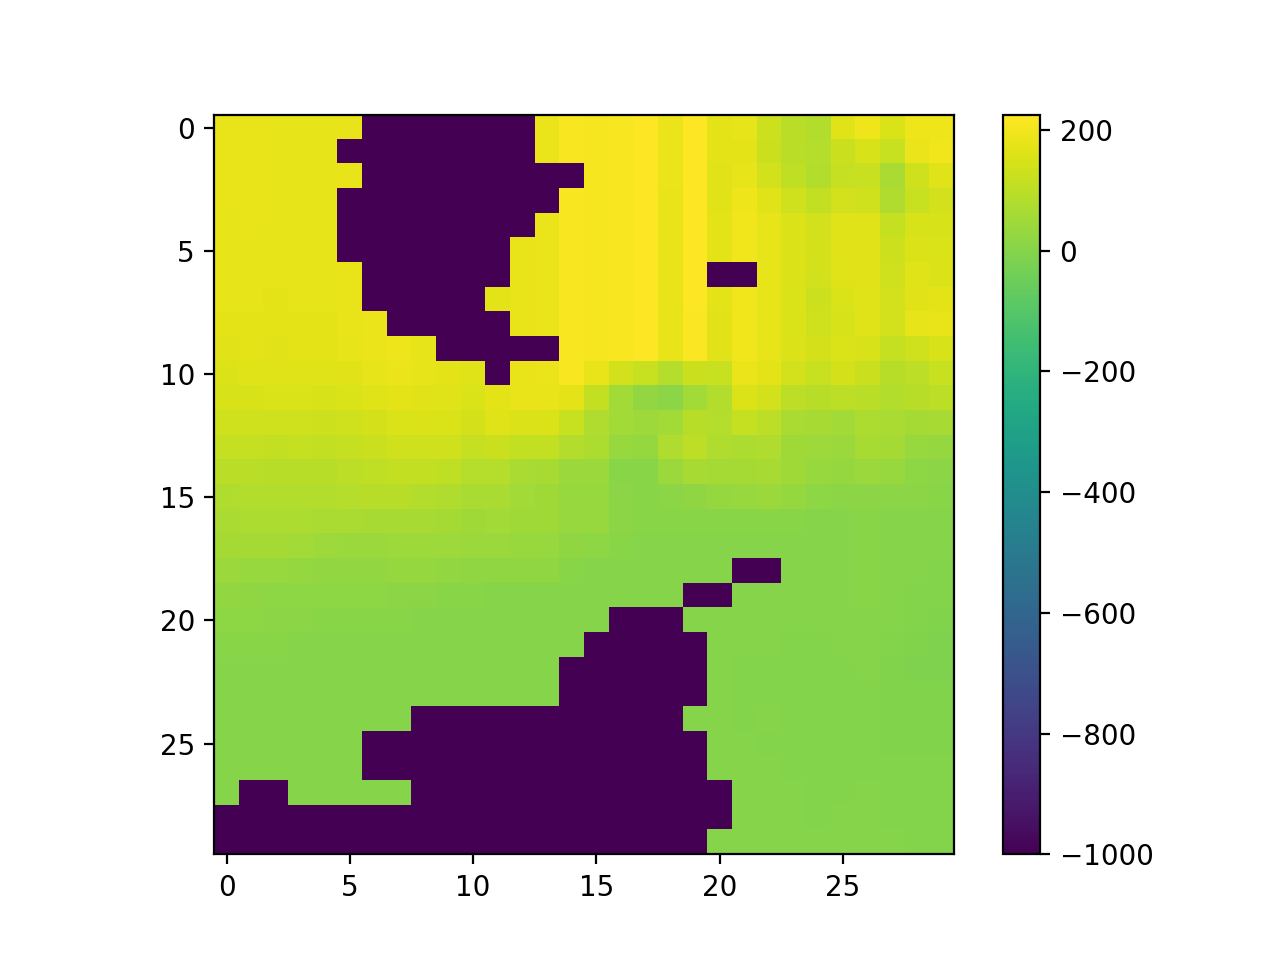

In [164]:
fig4, ax1 = plt.subplots(squeeze=False)
plotfield=np.copy(np.flipud(AGUV_bsf[15:45,280:310]))
plotfield[plotfield==0]=-1000. # missing
myax=plt.imshow(plotfield)
#datacursor(myax)
plt.colorbar()

In [131]:
plotfield[10,14] - plotfield[21,14]

212.01099321197717

#### GLOB

In [165]:
BSFfile = '/work/ab0995/a270046/hierarchy-grids/fpost_glob/fesom_BSF.nc'
fl = MFDataset(BSFfile)

GLOB_bsf=fl.variables['bsf'][:,:,:].mean(axis=0)
fl.close()

<IPython.core.display.Javascript object>


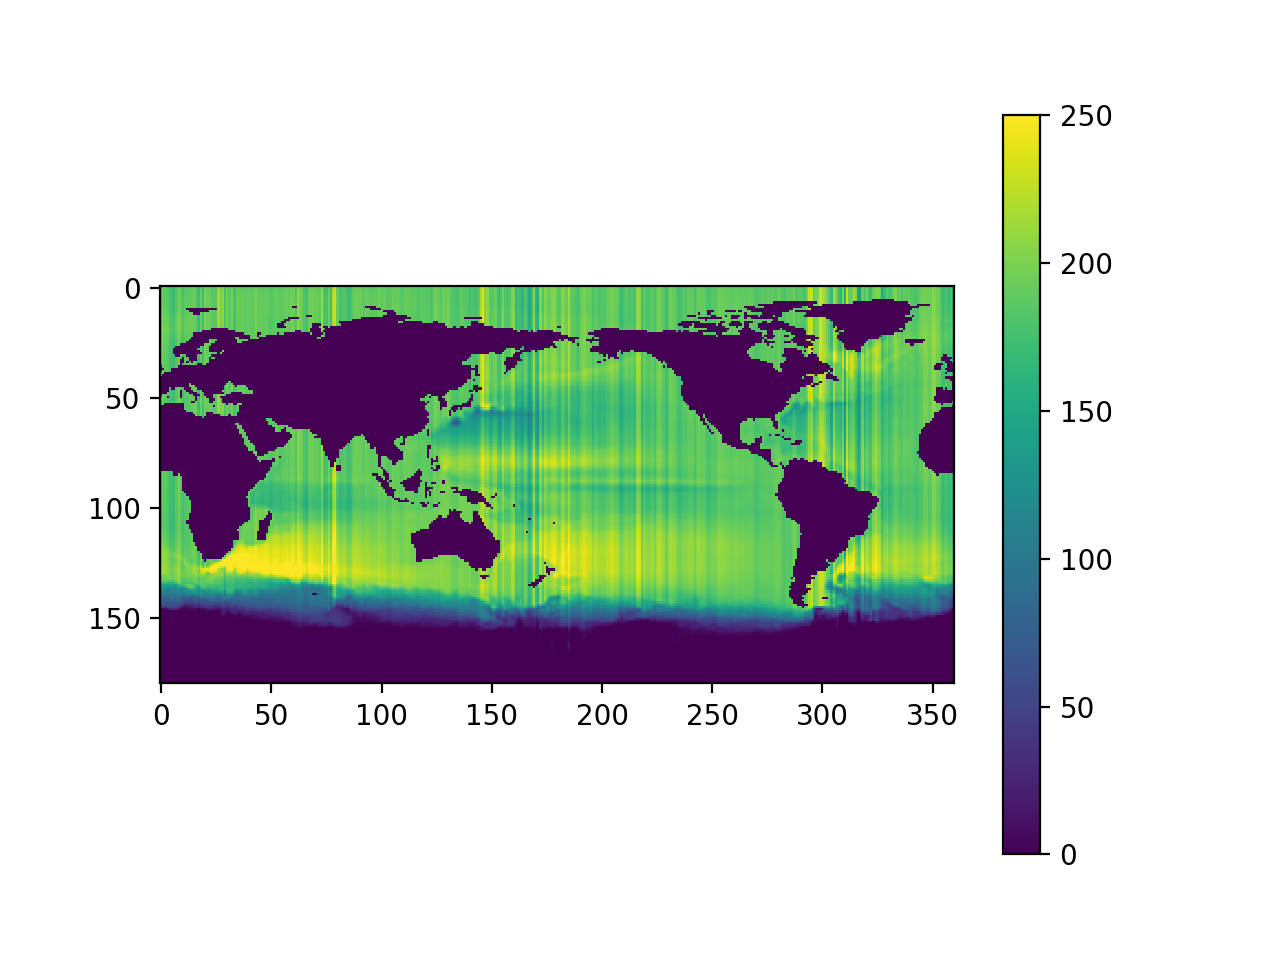

In [173]:
fig2, ax1 = plt.subplots(squeeze=False)

plt.imshow(np.flipud(np.squeeze(GLOB_bsf[:,:])),vmin=0, vmax=250)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


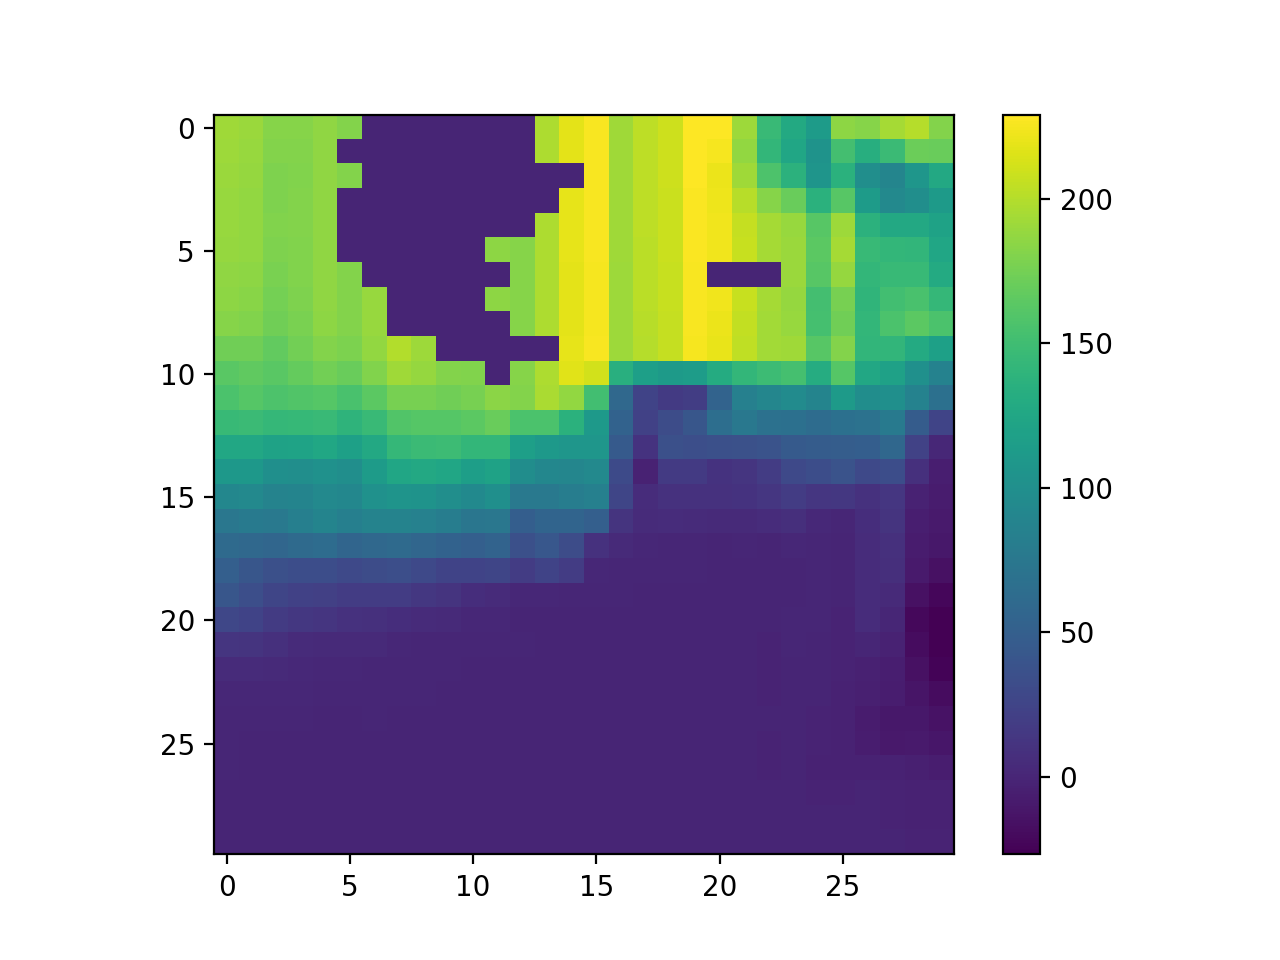

In [133]:
fig3, ax1 = plt.subplots(squeeze=False)

plt.imshow(np.flipud(np.squeeze(GLOB_bsf[15:45,280:310])))
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


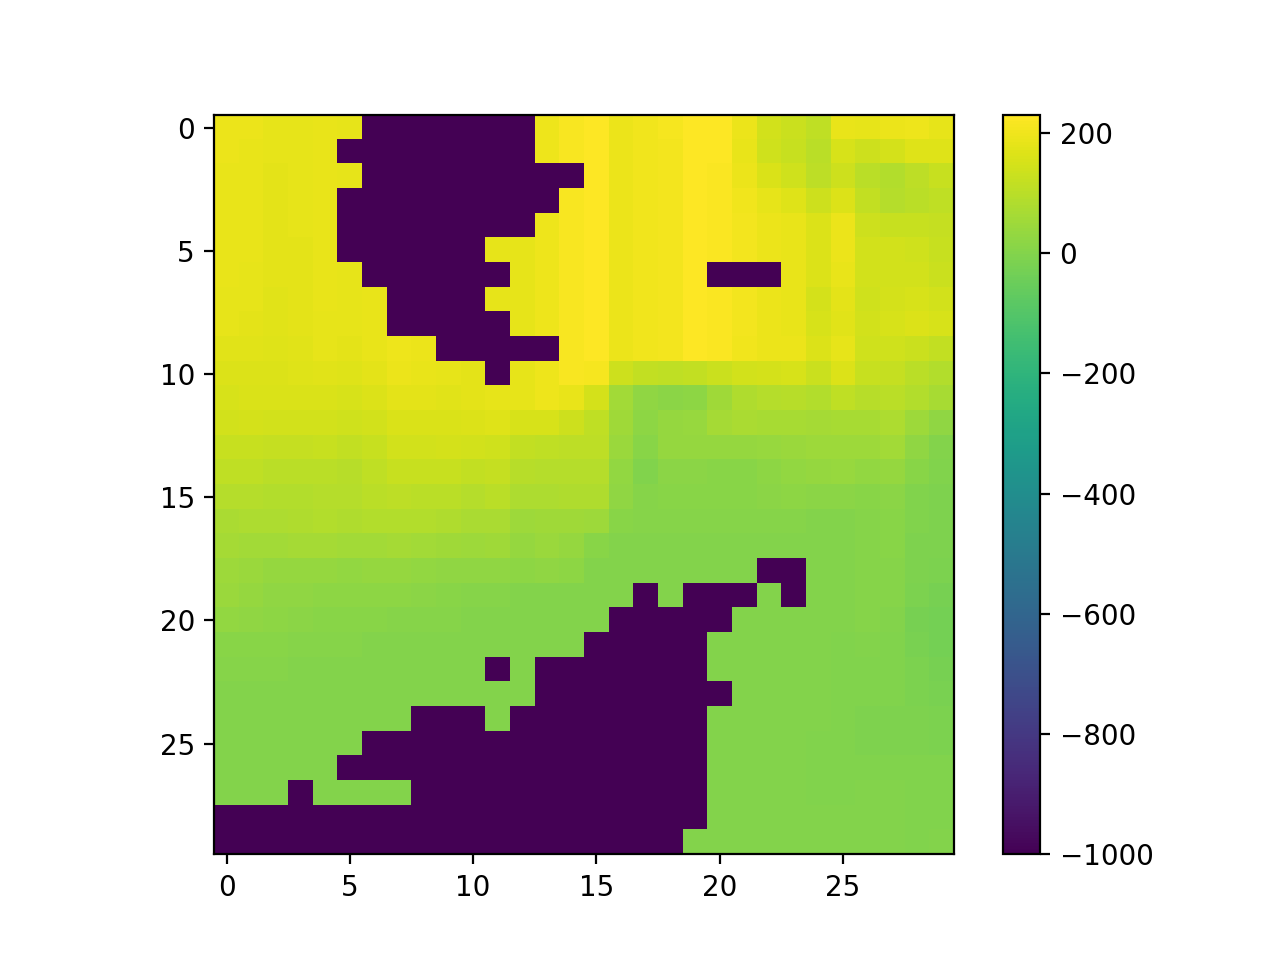

In [134]:
fig4, ax1 = plt.subplots(squeeze=False)
plotfield=np.copy(np.flipud(GLOB_bsf[15:45,280:310]))
plotfield[plotfield==0]=-1000. # missing
myax=plt.imshow(plotfield)
#datacursor(myax)
plt.colorbar()

In [135]:
plotfield[10,14] - plotfield[21,14]

217.90941882937429

#### BOLD

In [167]:
BSFfile = '/work/ab0995/a270046/hierarchy-grids/fpost_bold/fesom_BSF.nc'
fl = MFDataset(BSFfile)

BOLD_bsf=fl.variables['bsf'][:,:,:].mean(axis=0)
fl.close()

<IPython.core.display.Javascript object>


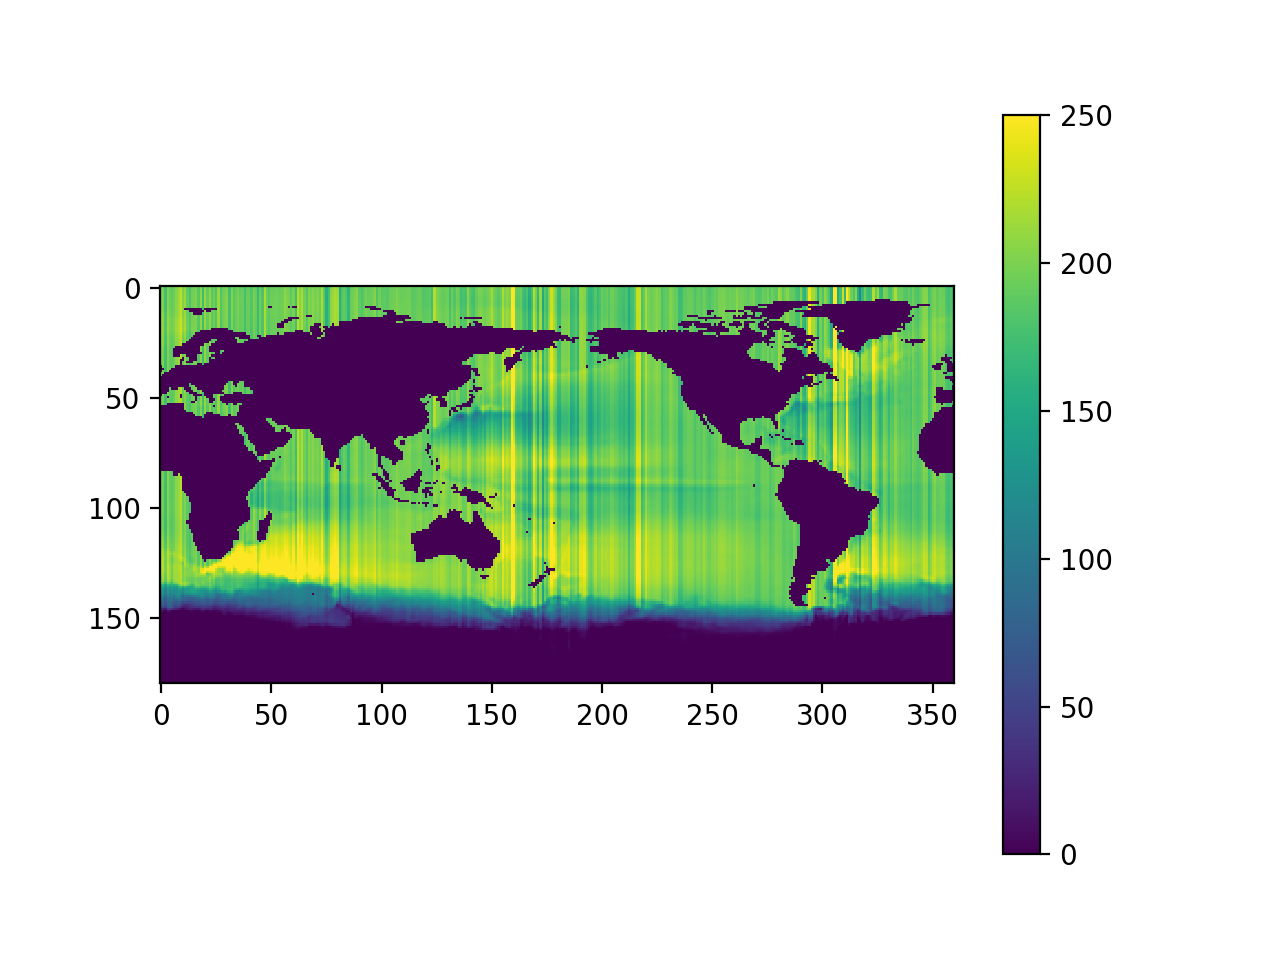

In [174]:
fig2, ax1 = plt.subplots(squeeze=False)

plt.imshow(np.flipud(np.squeeze(BOLD_bsf[:,:])),vmin=0, vmax=250)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


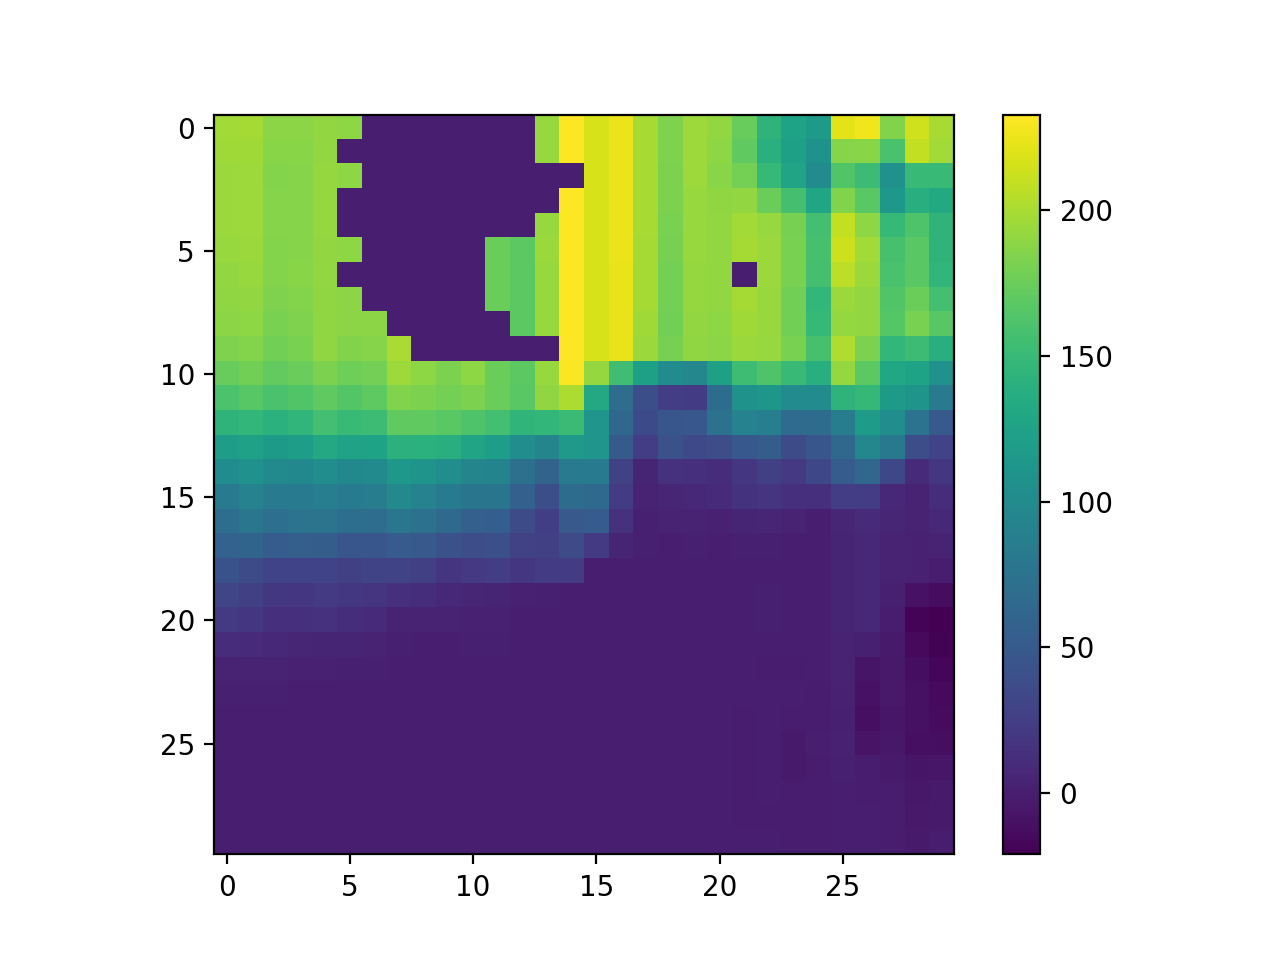

In [169]:
fig3, ax1 = plt.subplots(squeeze=False)

plt.imshow(np.flipud(np.squeeze(BOLD_bsf[15:45,280:310])))
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


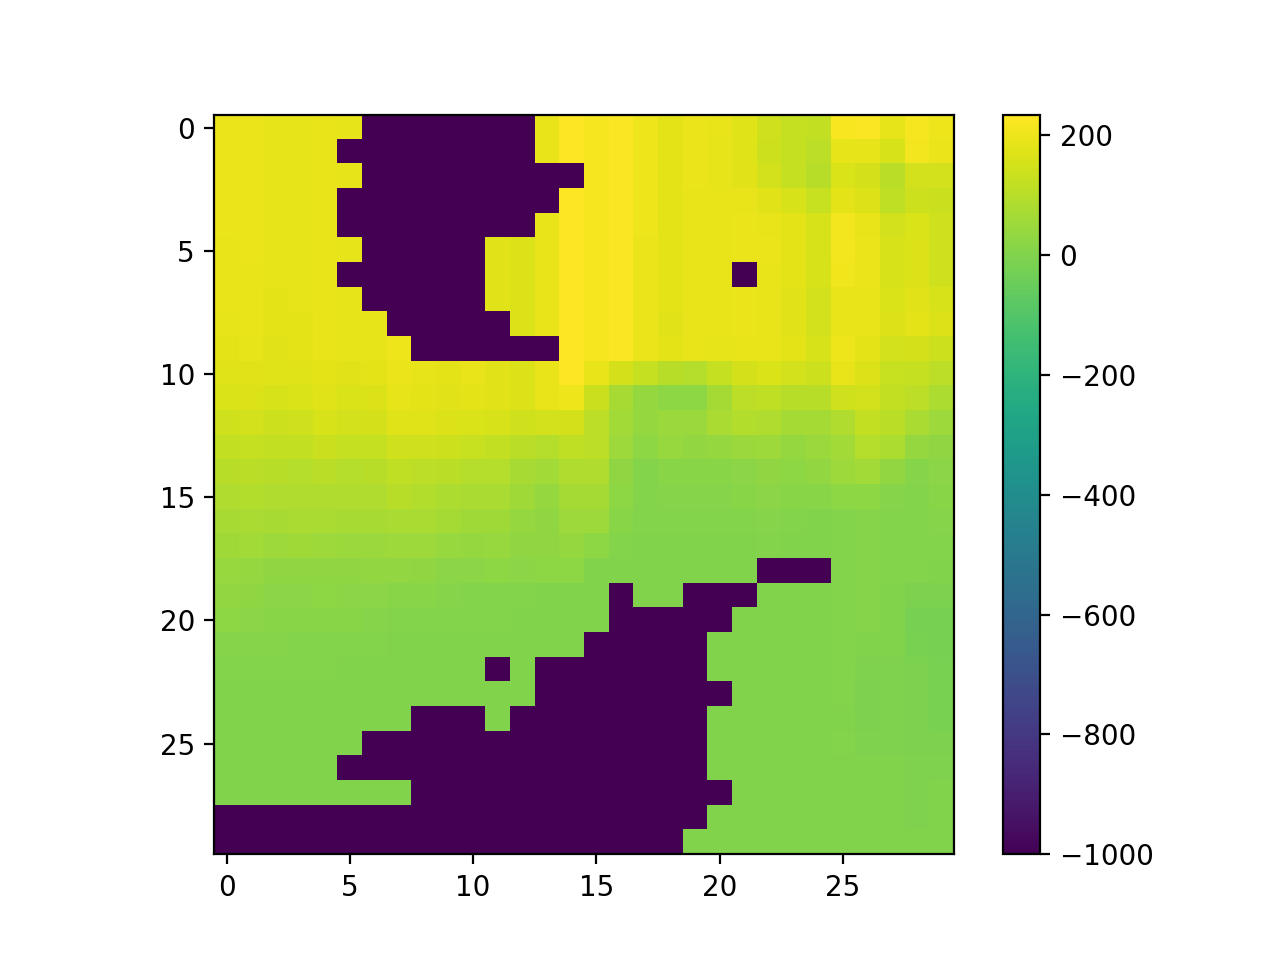

In [138]:
fig4, ax1 = plt.subplots(squeeze=False)
plotfield=np.copy(np.flipud(BOLD_bsf[15:45,280:310]))
plotfield[plotfield==0]=-1000. # missing
myax=plt.imshow(plotfield)
#datacursor(myax)
plt.colorbar()

In [139]:
plotfield[10,14] - plotfield[21,14]

231.44683537396998